### 1. Import and Load the Data
### •	Import necessary libraries (pandas, numpy, matplotlib, seaborn, sklearn etc.)
### •	Load the dataset and explore it using .head(), .info(), and .describe()


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import skew
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split,RandomizedSearchCV,StratifiedKFold
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,f1_score,classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,VotingClassifier,BaggingClassifier,AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.naive_bayes import GaussianNB
from imblearn.over_sampling import SMOTE,SMOTEN


import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_excel("BeansMulticlassClassification.xlsx")

In [3]:
df.head()

Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0  28395    610.291       208.178117       173.888747      1.197191   
1  28734    638.018       200.524796       182.734419      1.097356   
2  29380    624.110       212.826130       175.931143      1.209713   
3  30008    645.884       210.557999       182.516516      1.153638   
4  30140    620.134       201.847882       190.279279      1.060798   

   Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0      0.549812       28715     190.141097  0.763923  0.988856   0.958027   
1      0.411785       29172     191.272750  0.783968  0.984986   0.887034   
2      0.562727       29690     193.410904  0.778113  0.989559   0.947849   
3      0.498616       30724     195.467062  0.782681  0.976696   0.903936   
4      0.333680       30417     195.896503  0.773098  0.990893   0.984877   

   Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  Class  
0     0.913358      0.007332      0.003147      0.834222      0.998724  SEKER  
1     0.953861      0.006979      0.003564      0.909851      0.998430  SEKER  
2     0.908774      0.007244      0.003048      0.825871      0.999066  SEKER  
3     0.928329      0.007017      0.003215      0.861794      0.994199  SEKER  
4     0.970516      0.006697      0.003665      0.941900      0.999166  SEKER

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

In [5]:
df.describe().T

count          mean           std           min  \
Area             13611.0  53048.284549  29324.095717  20420.000000   
Perimeter        13611.0    855.283459    214.289696    524.736000   
MajorAxisLength  13611.0    320.141867     85.694186    183.601165   
MinorAxisLength  13611.0    202.270714     44.970091    122.512653   
AspectRation     13611.0      1.583242      0.246678      1.024868   
Eccentricity     13611.0      0.750895      0.092002      0.218951   
ConvexArea       13611.0  53768.200206  29774.915817  20684.000000   
EquivDiameter    13611.0    253.064220     59.177120    161.243764   
Extent           13611.0      0.749733      0.049086      0.555315   
Solidity         13611.0      0.987143      0.004660      0.919246   
roundness        13611.0      0.873282      0.059520      0.489618   
Compactness      13611.0      0.799864      0.061713      0.640577   
ShapeFactor1     13611.0      0.006564      0.001128      0.002778   
ShapeFactor2     13611.0      0.001716      0.000596      0.000564   
ShapeFactor3     13611.0      0.643590      0.098996      0.410339   
ShapeFactor4     13611.0      0.995063      0.004366      0.947687   

                          25%           50%           75%            max  
Area             36328.000000  44652.000000  61332.000000  254616.000000  
Perimeter          703.523500    794.941000    977.213000    1985.370000  
MajorAxisLength    253.303633    296.883367    376.495012     738.860153  
MinorAxisLength    175.848170    192.431733    217.031741     460.198497  
AspectRation         1.432307      1.551124      1.707109       2.430306  
Eccentricity         0.715928      0.764441      0.810466       0.911423  
ConvexArea       36714.500000  45178.000000  62294.000000  263261.000000  
EquivDiameter      215.068003    238.438026    279.446467     569.374358  
Extent               0.718634      0.759859      0.786851       0.866195  
Solidity             0.985670      0.988283      0.990013       0.994677  
roundness            0.832096      0.883157      0.916869       0.990685  
Compactness          0.762469      0.801277      0.834270       0.987303  
ShapeFactor1         0.005900      0.006645      0.007271       0.010451  
ShapeFactor2         0.001154      0.001694      0.002170       0.003665  
ShapeFactor3         0.581359      0.642044      0.696006       0.974767  
ShapeFactor4         0.993703      0.996386      0.997883       0.999733

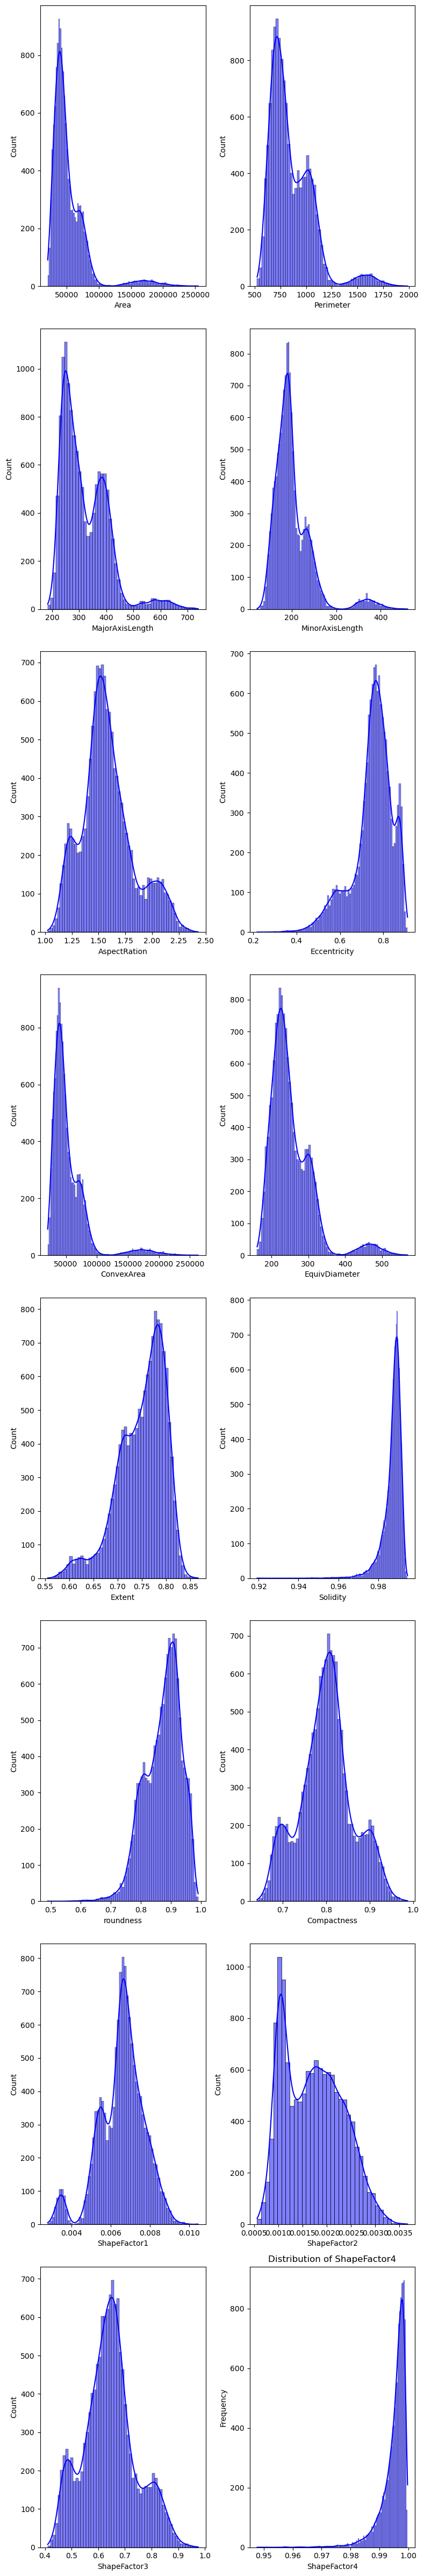

In [6]:
## PLotting Histogram to viz distribution

fig, axes = plt.subplots(nrows=8, ncols=2, figsize=(8, len(df.select_dtypes(include=np.number).columns) * 3))

for index,i in enumerate(df.select_dtypes(include=np.number).columns):
    sns.histplot(df[i],fill=True,kde=True,color='blue',ax=axes.flatten()[index])
    plt.title(f"Distribution of {i}")
    plt.xlabel(i)
    plt.ylabel("Frequency")

plt.tight_layout() 
plt.show()


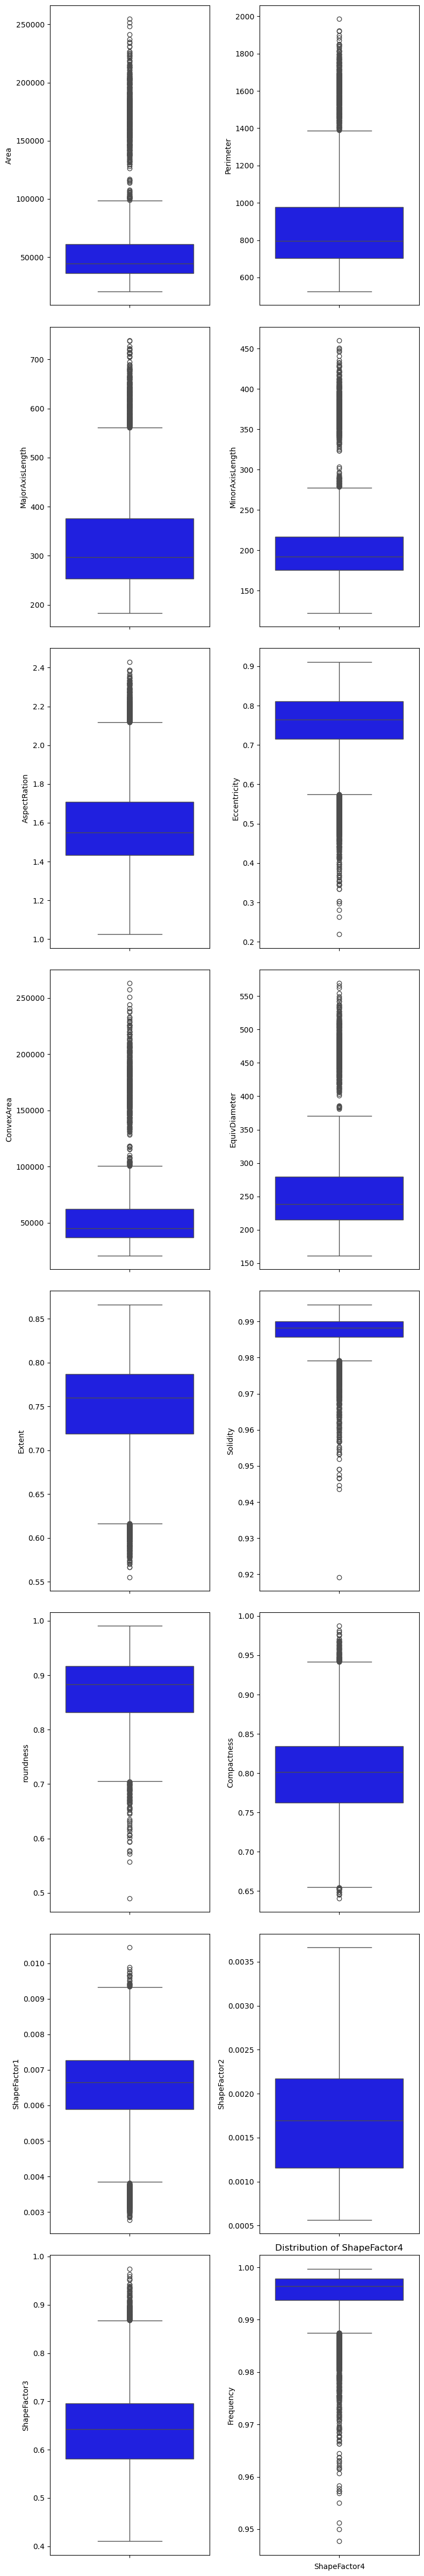

In [7]:
## PLotting Boxplot to viz outlier

fig, axes = plt.subplots(nrows=8, ncols=2, figsize=(8, len(df.select_dtypes(include=np.number).columns) * 3))

for index,i in enumerate(df.select_dtypes(include=np.number).columns):
    sns.boxplot(df[i],fill=True,color='blue',ax=axes.flatten()[index])
    plt.title(f"Distribution of {i}")
    plt.xlabel(i)
    plt.ylabel("Frequency")

plt.tight_layout() 
plt.show()


### Every feature have outlier and highly skewed data.

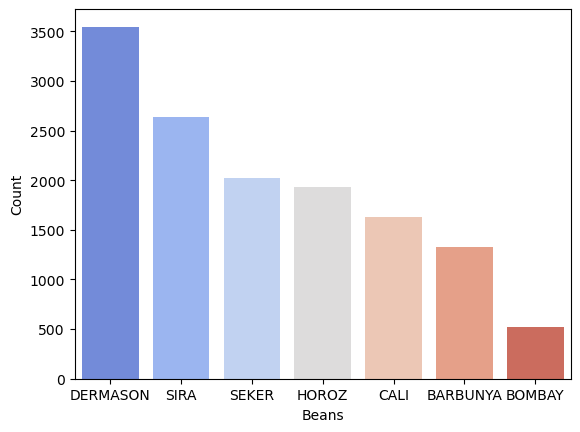

In [8]:
class_count = df['Class'].value_counts().reset_index()
class_count.columns = ['Beans', 'Count'] 

sns.barplot(x=class_count['Beans'],y=class_count['Count'],palette='coolwarm',fill=True)
plt.show()
                              

class_percentages 0    26.052458
1    19.366689
2    14.892366
3    14.165014
4    11.975608
5     9.712732
6     3.835133
Name: Percentage, dtype: float64


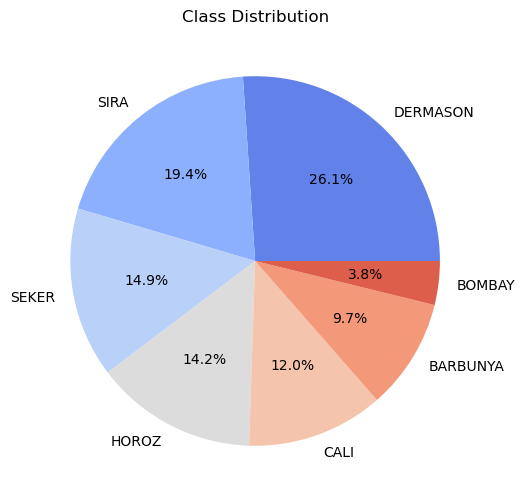

In [9]:
#class_counts = df['Class'].value_counts().rest_index()
class_count = df['Class'].value_counts().reset_index()
class_count.columns = ['Beans', 'Count'] 
class_count['Percentage'] = (class_count['Count'] / class_count['Count'].sum()) * 100

print("class_percentages",class_count['Percentage'])
colors = sns.color_palette("coolwarm", len(class_count))
plt.figure(figsize=(8, 6))
plt.pie(class_count['Percentage'], labels=class_count['Beans'], autopct='%1.1f%%', 
        colors=colors)  # Correct colormap usage

plt.title("Class Distribution")
plt.show()


### BOMBAY and BARBUNYA is highly imbalanced data

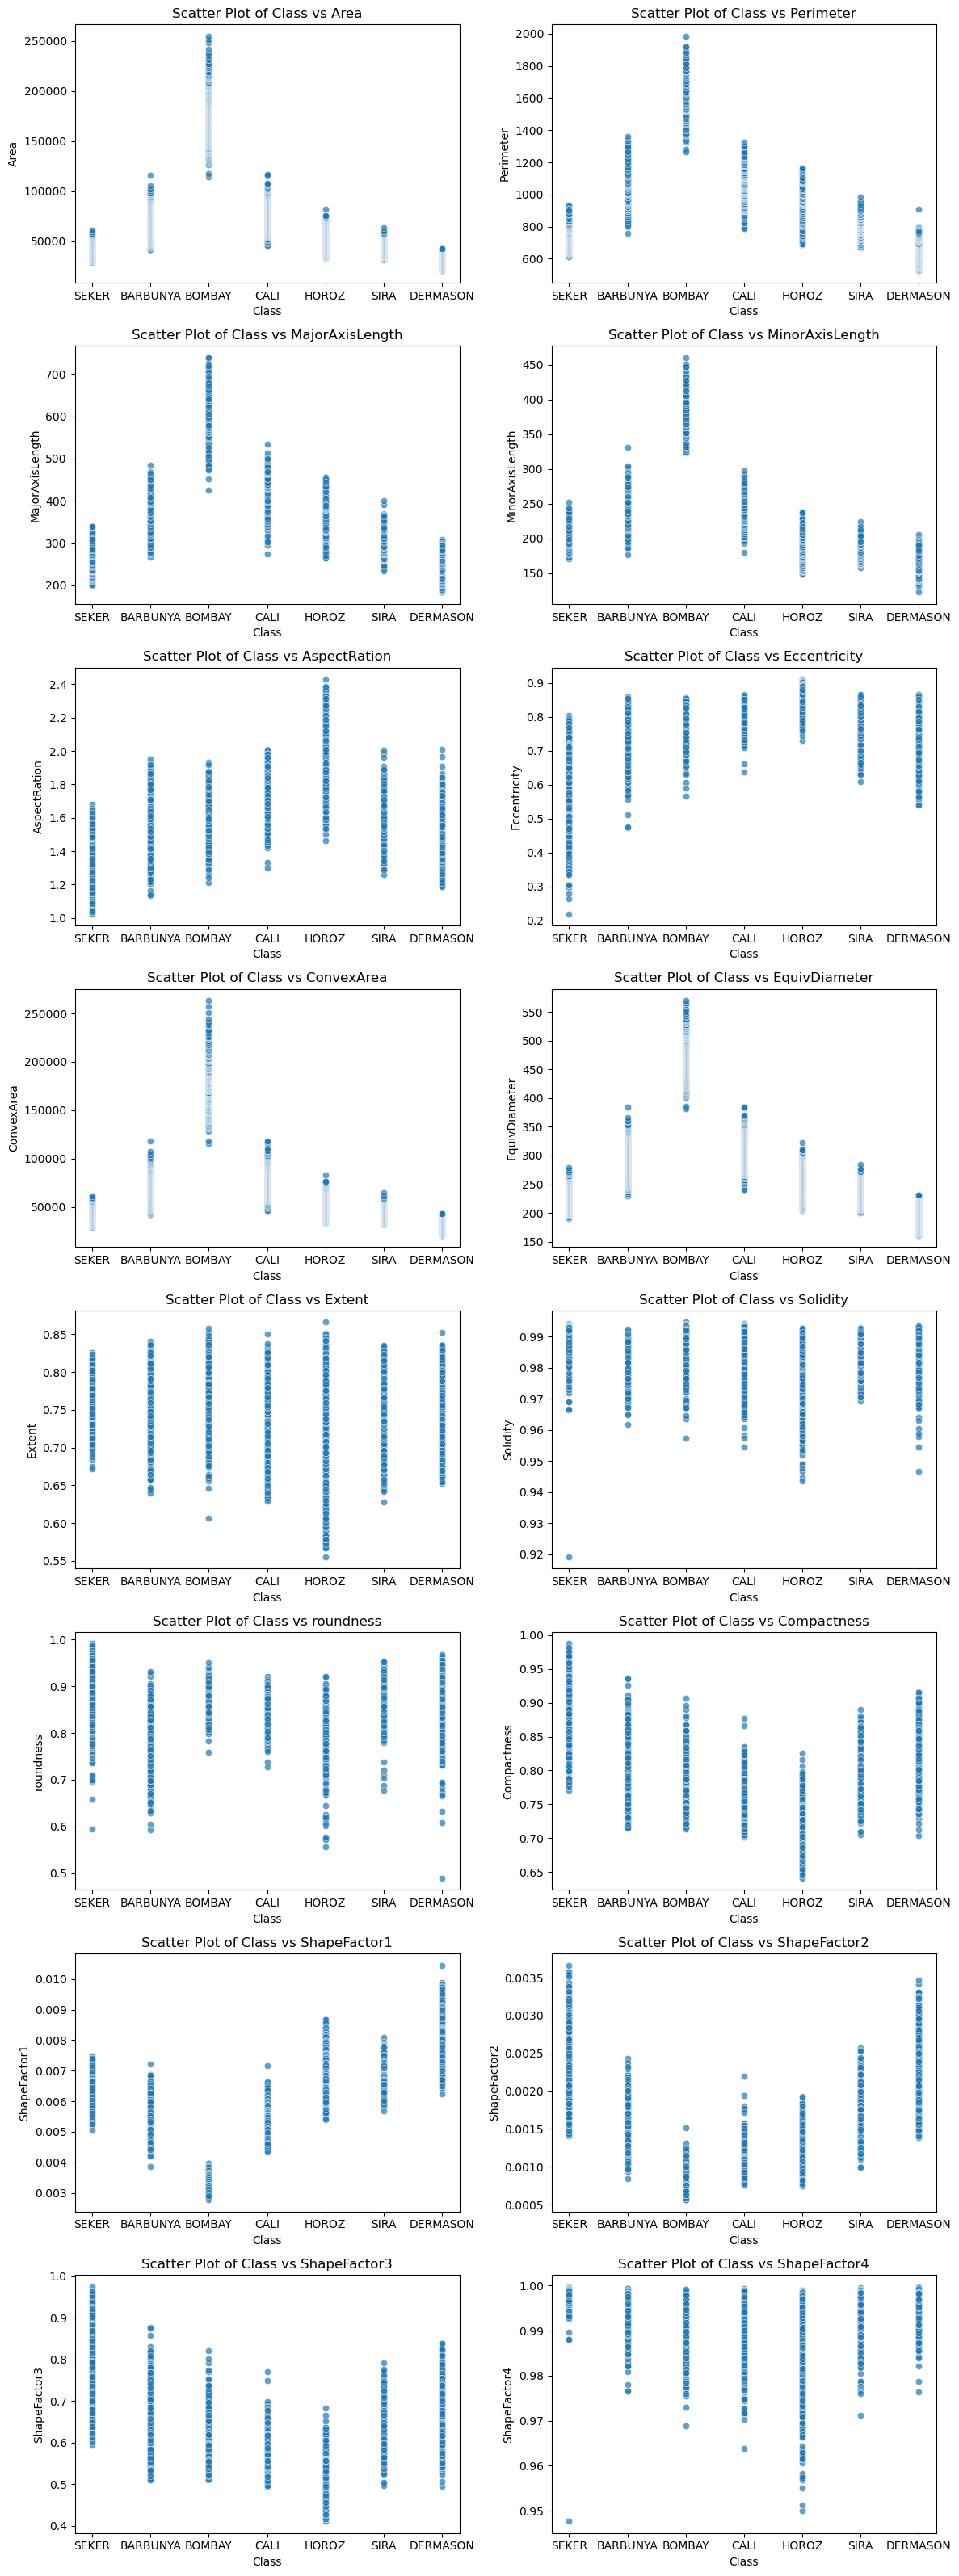

In [10]:
fig, axes = plt.subplots(nrows=8, ncols=2, figsize=(12, len(df.select_dtypes(include=np.number).columns) * 2))

axes = axes.flatten()  

for index, col in enumerate(df.select_dtypes(include=np.number).columns):
    sns.scatterplot(data=df, x='Class', y=col, ax=axes[index], alpha=0.7)  
    axes[index].set_title(f"Scatter Plot of Class vs {col}")
    axes[index].set_xlabel("Class")
    axes[index].set_ylabel(col)

plt.tight_layout()  
plt.show()

### BOMBAY BEANS SEEMS TO BE MOST BIGGER IN SIZE AND DERMASON IS MOST SMALLEST IN SIZE

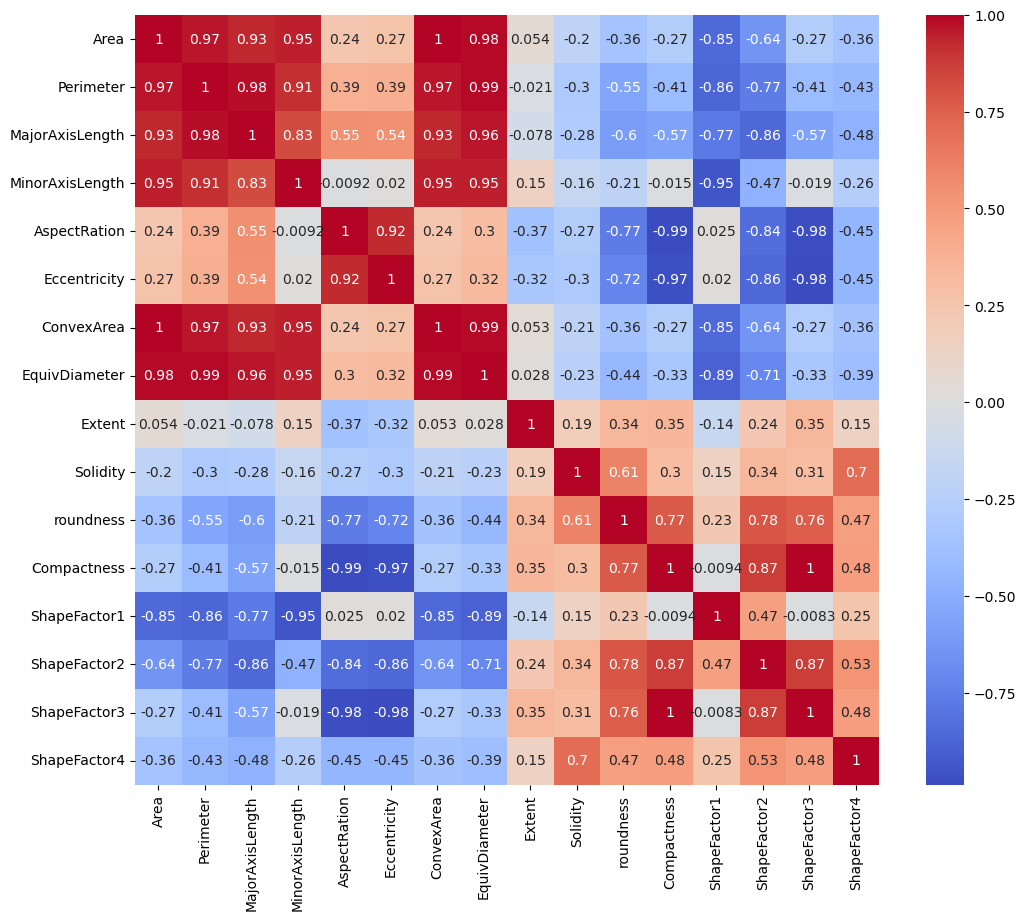

In [11]:
### Feature Correlation
plt.figure(figsize=(12,10))
sns.heatmap(df.select_dtypes(include=np.number).corr(),annot=True,fmt='.2g',cbar=True,cmap='coolwarm')
plt.show()

In [12]:
#sns.pairplot(df,palette='coolwarm',hue='Class')
#plt.show()

# OBSERVATION
### BOMBAY and BARBUNYA is highly imbalanced data
### BOMBAY BEANS SEEMS TO BE MOST BIGGER IN SIZE AND DERMASON IS MOST SMALLEST IN SIZE
### Area is highly positive correlated with Perimeter, MajorAxisLength, MinorAxisLength, EquivDiameter
### Area is highly Negative correlated with ShapeFactor1
### AspectRation is highly neagtive correlated with Compactness
### ShapeFactor3 is highly positive correlated with Compactness
### Area is highly positive correlated with ConvexArea
### Perimeter, MajorAxisLength, MinorAxisLength are highly positive correlated with EquivDiameter 
### Moderate Correlations is AspectRatio vs Eccentricity (0.9243) and Perimeter vs EquivDiameter (0.9913)
### these correlation shows multicollinearly between features ( redundant) like Area vs ConvexArea (0.9999), MajorAxisLength vs Perimeter (0.9773), EquivDiameter vs Area (0.9849). Thus VIF will be used to handle it.

## 3. Missing Values & Outlier Treatment
## •	Check for and handle missing values
## •	Detect and treat outliers if needed (Z-score / IQR methods/boxplots)


In [13]:
df.isna().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

In [14]:
df.shape

(13611, 17)

In [15]:
df.drop_duplicates(inplace=True)

In [16]:
df.shape

(13543, 17)

In [17]:
# Treating outlier using IQR 

def set_outliers_iqr(column):
    Q1 = np.percentile(df[column], 25)
    Q3 = np.percentile(df[column], 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df[col] = np.clip(df[col], lower_bound, upper_bound)

# Apply IQR filtering on all numerical columns

for col in df.select_dtypes(include=np.number):
    set_outliers_iqr(col)



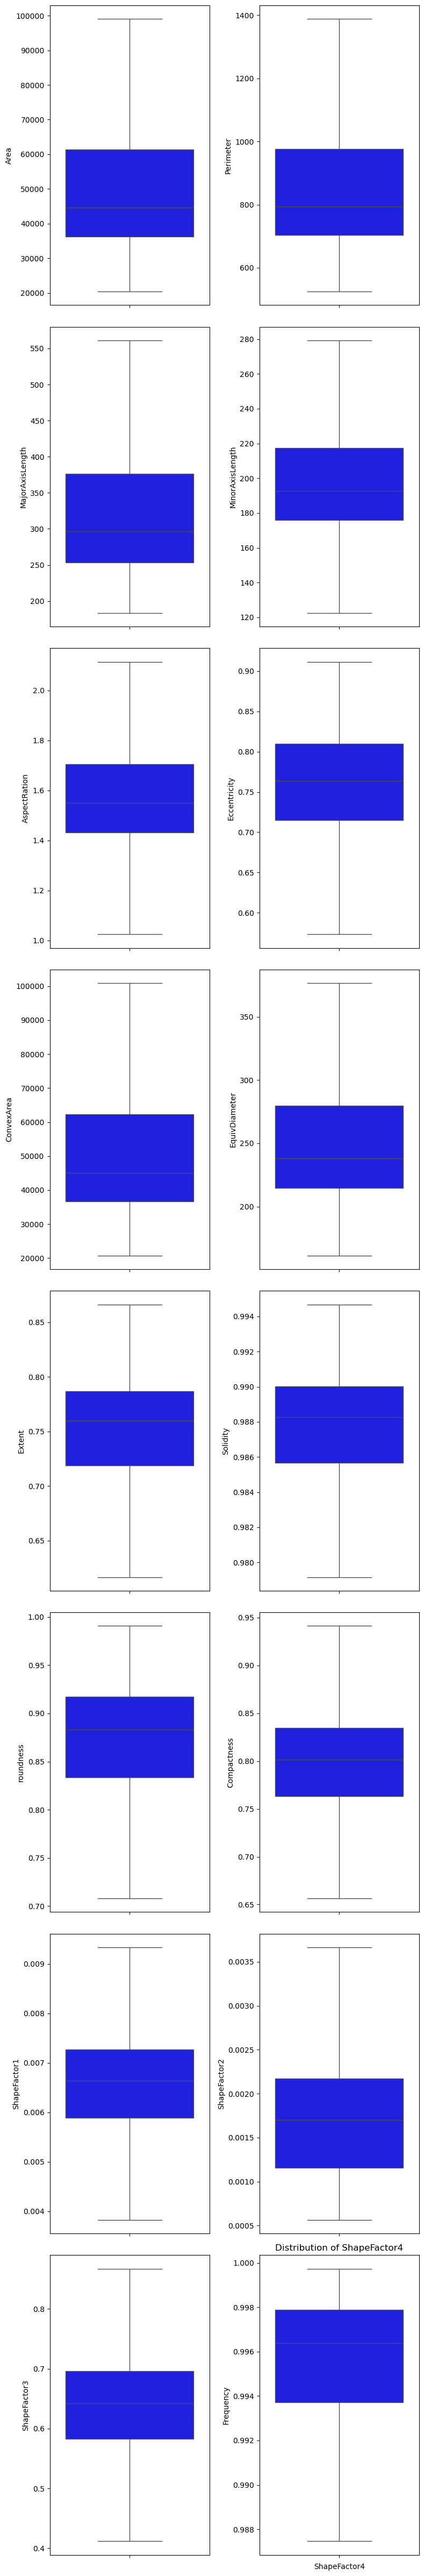

In [18]:
# checking outlier

## PLotting Boxplot to viz outlier

fig, axes = plt.subplots(nrows=8, ncols=2, figsize=(8, len(df.select_dtypes(include=np.number).columns) * 3))

for index,i in enumerate(df.select_dtypes(include=np.number).columns):
    sns.boxplot(df[i],fill=True,color='blue',ax=axes.flatten()[index])
    plt.title(f"Distribution of {i}")
    plt.xlabel(i)
    plt.ylabel("Frequency")

plt.tight_layout() 
plt.show()


In [19]:
df.select_dtypes(include=np.number).skew()


Area               0.962041
Perimeter          0.966336
MajorAxisLength    0.978854
MinorAxisLength    0.729091
AspectRation       0.470467
Eccentricity      -0.614243
ConvexArea         0.969221
EquivDiameter      0.839585
Extent            -0.782121
Solidity          -0.844469
roundness         -0.497000
Compactness        0.017507
ShapeFactor1      -0.332581
ShapeFactor2       0.294332
ShapeFactor3       0.191359
ShapeFactor4      -1.039942
dtype: float64

In [20]:
## Handling skewness

def apply_transformation(data):
    skew_value = skew(data)  
    print(skew_value)
    if skew_value > 1:  # Highly Right-Skewed
        return np.log(data + 1)  
    elif skew_value < -1:  # Highly Left-Skewed
        return data ** 2  
    elif 0.5 <= skew_value <= 1:  # Moderately Right-Skewed
        return np.sqrt(data)  # Square root transformation
    elif -1 <= skew_value <= -0.5:  # Moderately Left-Skewed
        transformer = PowerTransformer(method='yeo-johnson')  
        return transformer.fit_transform(data.values.reshape(-1, 1))  # Yeo-Johnson transformation
    else:
        return data  # No transformation needed

# Apply function to a column in DataFrame
for i in df.select_dtypes(np.number).columns:
    print(i)
    df[i] = apply_transformation(df[i])


Area
0.9619344379829043
Perimeter
0.9662284916438035
MajorAxisLength
0.9787455938091548
MinorAxisLength
0.7290106984301074
AspectRation
0.47041488559595207
Eccentricity
-0.6141746786420814
ConvexArea
0.9691139233472545
EquivDiameter
0.839491748294577
Extent
-0.7820342997297288
Solidity
-0.8443756590747212
roundness
-0.4969445826289001
Compactness
0.017505345073208327
ShapeFactor1
-0.3325443187760899
ShapeFactor2
0.2942995991863808
ShapeFactor3
0.1913379486507147
ShapeFactor4
-1.0398272664459696


In [21]:
df.select_dtypes(include=np.number).skew()


Area               0.651700
Perimeter          0.734688
MajorAxisLength    0.711429
MinorAxisLength    0.554341
AspectRation       0.470467
Eccentricity      -0.058705
ConvexArea         0.658730
EquivDiameter      0.643241
Extent            -0.088945
Solidity          -0.098821
roundness         -0.497000
Compactness        0.017507
ShapeFactor1      -0.332581
ShapeFactor2       0.294332
ShapeFactor3       0.191359
ShapeFactor4      -1.034665
dtype: float64

In [22]:
df.head()

Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0  168.508160  24.704068        14.428379        13.186688      1.197191   
1  169.511062  25.259018        14.160678        13.517930      1.097356   
2  171.405951  24.982194        14.588562        13.263904      1.209713   
3  173.228173  25.414248        14.510617        13.509867      1.153638   
4  173.608756  24.902490        14.207318        13.794176      1.060798   

   Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0     -1.860222  169.455009      13.789166  0.158082  0.262842   0.958027   
1     -1.860222  170.798126      13.830139  0.682103 -0.852677   0.887034   
2     -1.860222  172.307864      13.907225  0.521744  0.520478   0.947849   
3     -1.860222  175.282629      13.980954  0.646321 -1.853359   0.903936   
4     -1.860222  174.404702      13.996303  0.389264  1.067030   0.984877   

   Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  Class  
0     0.913358      0.007332      0.003147      0.834222      0.997449  SEKER  
1     0.941333      0.006979      0.003564      0.867076      0.996863  SEKER  
2     0.908774      0.007244      0.003048      0.825871      0.998133  SEKER  
3     0.928329      0.007017      0.003215      0.861794      0.988431  SEKER  
4     0.941333      0.006697      0.003665      0.867076      0.998333  SEKER

***
Exploring with VIF

df_copy = df.copy()
X_vif = df_copy.select_dtypes(include=np.number)

while True:
    vif_data = pd.DataFrame()
    vif_data["Feature"] = X_vif.columns
    vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]
    max_vif = vif_data["VIF"].max()
    
    if max_vif < 10:
        break

    feature_to_drop = vif_data.loc[vif_data["VIF"] == max_vif, "Feature"].values[0]
    X_vif = X_vif.drop(columns=[feature_to_drop])

    print(f"Dropping: {feature_to_drop} (VIF={max_vif:.2f})")

print("Final VIF values below 10:\n", vif_data)***


In [23]:
#cocat_x = pd.concat([X_vif, df[['Class']]], axis=1)
#cocat_x

### 4. Feature Engineering & Preprocessing
•	Scale numerical features (StandardScaler / MinMaxScaler)
•	Encode categorical variables if necessary
•	Check and treat skewness if required
•	Split data into train/test sets (use stratified sampling while splitting)
________________________________________


In [24]:
df_x = df.select_dtypes(include=np.number)
df_x.columns

Index(['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4'],
      dtype='object')

In [25]:
## Standard scaler for independent variables
scaler = StandardScaler()


X_scaled = scaler.fit_transform(df_x)
cocat_x_scaled = pd.DataFrame(X_scaled, columns=df_x.columns, index=df_x.index)  # Preserve index




In [27]:
label_encoder = LabelEncoder()
df_encode_class = pd.DataFrame()
df_encode_class['Class_Encoded'] = label_encoder.fit_transform(df['Class'])

class_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Class Label Mapping:", class_mapping)

#cocat_x_scaled_y.head()


Class Label Mapping: {'BARBUNYA': 0, 'BOMBAY': 1, 'CALI': 2, 'DERMASON': 3, 'HOROZ': 4, 'SEKER': 5, 'SIRA': 6}


In [28]:
## Applying PCA as VIF is dropping almost all columns 

PCA_X = PCA(n_components=0.9)
pca_values = PCA_X.fit_transform(cocat_x_scaled)



In [29]:
print(PCA_X.explained_variance_ratio_)

[0.59728515 0.23976262 0.0682247 ]


In [30]:
# Convert PCA values to a DataFrame with proper column names
pca_df = pd.DataFrame(pca_values, columns=[f'PC{i+1}' for i in range(pca_values.shape[1])], index=df_encode_class.index)

cocat_x_scaled_y = pd.concat([pca_df, df_encode_class], axis=1)

cocat_x_scaled_y.head()


PC1       PC2       PC3  Class_Encoded
0 -5.456254 -1.209810 -0.896409              5
1 -5.318290 -1.696987 -2.133599              5
2 -5.240406 -1.329850 -0.499201              5
3 -4.513237 -1.378405 -3.069471              5
4 -5.998984 -2.484219 -0.454011              5

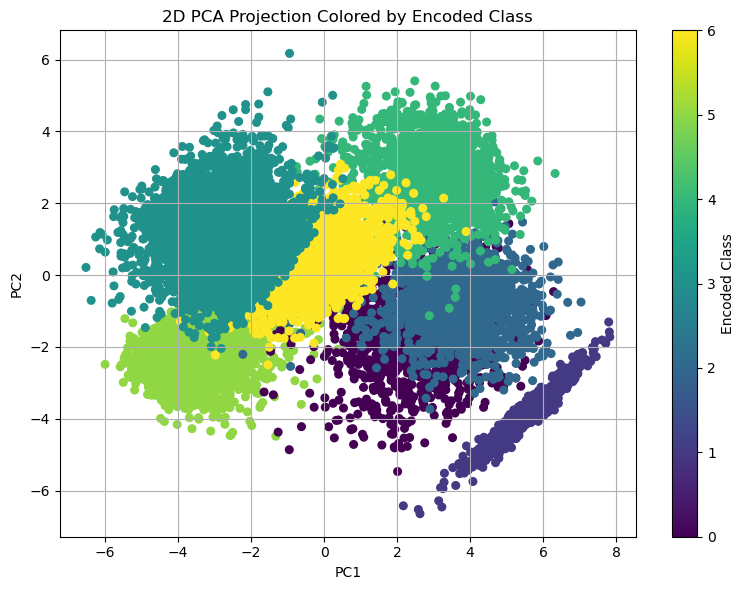

In [31]:
plt.figure(figsize=(8, 6))
plt.scatter(pca_values[:, 0], pca_values[:, 1], c=cocat_x_scaled_y['Class_Encoded'], cmap='viridis', s=30)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('2D PCA Projection Colored by Encoded Class')
plt.colorbar(label='Encoded Class')
plt.grid(True)
plt.tight_layout()
plt.show()


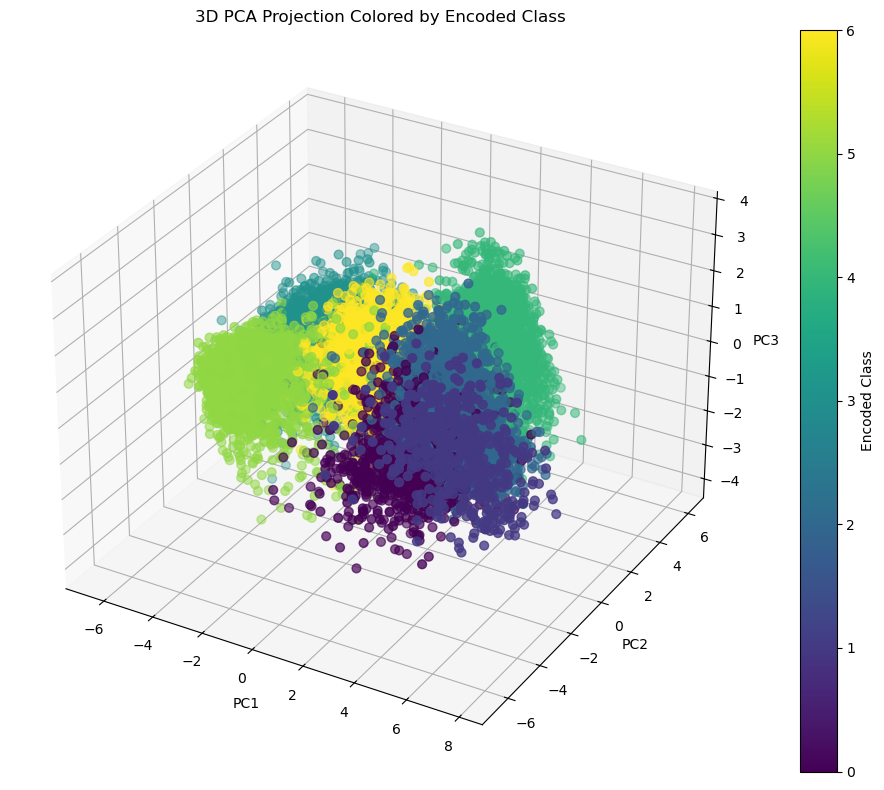

In [32]:
## 3D Viz of scatter plot as we have PCA1, PCA2, and PCA3
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Use PC1, PC2, and PC3 from pca_values and color by encoded class
scatter = ax.scatter(
    pca_values[:, 0], pca_values[:, 1], pca_values[:, 2],
    c=cocat_x_scaled_y['Class_Encoded'], cmap='viridis', s=40
)

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('3D PCA Projection Colored by Encoded Class')
fig.colorbar(scatter, label='Encoded Class')
plt.tight_layout()
plt.show()


In [33]:
#cocat_x_scaled_y.drop(columns=['Class'],inplace=True)

In [34]:
cocat_x_scaled_y.rename(columns={'Class_Encoded':'Class'},inplace=True)

In [35]:
cocat_x_scaled_y

PC1       PC2       PC3  Class
0     -5.456254 -1.209810 -0.896409      5
1     -5.318290 -1.696987 -2.133599      5
2     -5.240406 -1.329850 -0.499201      5
3     -4.513237 -1.378405 -3.069471      5
4     -5.998984 -2.484219 -0.454011      5
...         ...       ...       ...    ...
13538 -1.202729  0.420848  0.665252      3
13539 -1.704887 -0.580638  1.287870      3
13540 -1.461783 -0.180118  0.192331      3
13541 -1.080076  0.190543 -0.648525      3
13542 -0.774858  0.665609  1.217645      3

[13543 rows x 4 columns]

In [36]:
valu_counts = cocat_x_scaled_y['Class'].value_counts()
valu_counts

Class
3    3546
6    2636
5    2027
4    1860
2    1630
0    1322
1     522
Name: count, dtype: int64

In [37]:
X = cocat_x_scaled_y.drop(columns=['Class'])
Y = cocat_x_scaled_y['Class']

In [38]:
#X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=42)


In [39]:
serial_number = []
modelName = []
accuracy_score_train = []
accuracy_score_test = []
recall_score_train = []
recall_score_test = []
precision_score_train = []
precision_score_test = []
f1_score_train = []
f1_score_test = []
CV_Used = []
model_fit_status = []
smote_used = []

def evaluate_model(y_train, y_test, y_train_pred, y_test_pred, model_name,cv,smote):
    """Evaluates the model using various metrics and stores results in a DataFrame for comparison."""
    
    # Append model name
    modelName.append(model_name)
    serial_number.append(len(modelName))
    CV_Used.append(cv)
    smote_used.append(smote)

    # Compute accuracy scores
    accuracy_score_train_ml = accuracy_score(y_train, y_train_pred)
    accuracy_score_test_ml = accuracy_score(y_test, y_test_pred)
    accuracy_score_train.append(accuracy_score_train_ml)
    accuracy_score_test.append(accuracy_score_test_ml)

    # Compute recall scores
    recall_score_train_ml = recall_score(y_train, y_train_pred, average='weighted')
    recall_score_test_ml = recall_score(y_test, y_test_pred, average='weighted')
    recall_score_train.append(recall_score_train_ml)
    recall_score_test.append(recall_score_test_ml)

    # Compute precision scores
    precision_score_train_ml = precision_score(y_train, y_train_pred, average='weighted')
    precision_score_test_ml = precision_score(y_test, y_test_pred, average='weighted')
    precision_score_train.append(precision_score_train_ml)
    precision_score_test.append(precision_score_test_ml)

    #confusion Matrix - training
    print("confusion Matrix - training")
    ax=sns.heatmap(confusion_matrix(y_train,y_train_pred,labels=[0,1,2,3,4,5,6]),annot=True,linewidth=.5,cmap="crest",fmt='d',)
    ax.set(xlabel="Actual",ylabel="Predicted")
    ax.xaxis.tick_top()
    plt.show()

    
    #confusion Matrix - testing
    print("confusion Matrix - testing")
    ax=sns.heatmap(confusion_matrix(y_test,y_test_pred,labels=[0,1,2,3,4,5,6]),annot=True,linewidth=.5,cmap="crest",fmt='d',)
    ax.set(xlabel="Actual",ylabel="Predicted")
    ax.xaxis.tick_top()
    plt.show()


    # Compute F1 scores
    f1_score_train_ml = f1_score(y_train, y_train_pred, average='macro')
    f1_score_test_ml = f1_score(y_test, y_test_pred, average='macro')
    f1_score_train.append(f1_score_train_ml)
    f1_score_test.append(f1_score_test_ml)

    # Detect Overfitting or Underfitting , we have hihly imbalanced data so considering 0.7 as threshold
    def detect_overfitting(f1_score_train_ml, f1_score_test_ml, threshold_low=0.7):
        gap = abs(f1_score_train_ml - f1_score_test_ml)

        if f1_score_train_ml == 1.0 and f1_score_test_ml < 0.9:
            return "overfitting"
        elif f1_score_train_ml < threshold_low and f1_score_test_ml < threshold_low:
            return "underfitting"
        elif gap > 0.15:
            return "overfitting"
        else:
            return "balanced"

    model_status = detect_overfitting(f1_score_train_ml, f1_score_test_ml)
    print(f"Accuracy Difference: {abs(accuracy_score_train_ml - accuracy_score_test_ml):.4f}, Model Status: {model_status}")
    model_fit_status.append(model_status)



In [40]:
def create_evaluation_dataframe(modelName, accuracy_score_train, accuracy_score_test,
                                recall_score_train, recall_score_test,
                                precision_score_train, precision_score_test,
                                f1_score_train, f1_score_test,CV_Used,smote_used,
                                model_fit_status):
    

    df_results = pd.DataFrame({
        "SLno": serial_number,
        "Model Name": modelName,
        "Training Accuracy Score": accuracy_score_train,
        "Testing Accuracy Score": accuracy_score_test,
        "Training Recall Score": recall_score_train,
        "Testing Recall Score": recall_score_test,
        "Training Precision Score": precision_score_train,
        "Testing Precision Score": precision_score_test,
        "Training F1 Score": f1_score_train,
        "Testing F1 Score": f1_score_test,
        "Cross Validation Used": CV_Used,
        "Smote used": smote_used,
        "Model Fit Status": model_fit_status
    })

    
    print(df_results.to_markdown(index=False))
    
    return df_results.round(3)


In [41]:
report_counter = {"count": 0}
all_classification_reports = []

def generate_classification_report(y_train_true, y_test_true, y_train_pred, y_test_pred, model_name):
    # Helper to format and tag each report
    def create_report(y_true, y_pred, dataset_type):
        report_dict = classification_report(y_true, y_pred, output_dict=True)
        df = pd.DataFrame(report_dict).transpose()
        df['Dataset'] = dataset_type
        return df

    # Generate individual reports
    train_report = create_report(y_train_true, y_train_pred, 'Train')
    test_report = create_report(y_test_true, y_test_pred, 'Test')

    # Combine and reset index to bring class names into a column
    report_df = pd.concat([train_report, test_report], axis=0).reset_index().rename(columns={'index': 'Class'})

    # Add metadata
    report_counter["count"] += 1
    report_df['ModelName'] = model_name
    report_df['SLno'] = report_counter["count"]

    report_df.drop(report_df[report_df['Class'] == 'accuracy'].index, inplace=True)
    report_df.drop(report_df[report_df['Class'] == 'macro avg'].index, inplace=True)
    report_df.drop(report_df[report_df['Class'] == 'weighted avg'].index, inplace=True)
    

    return report_df.round(3)


confusion Matrix - training


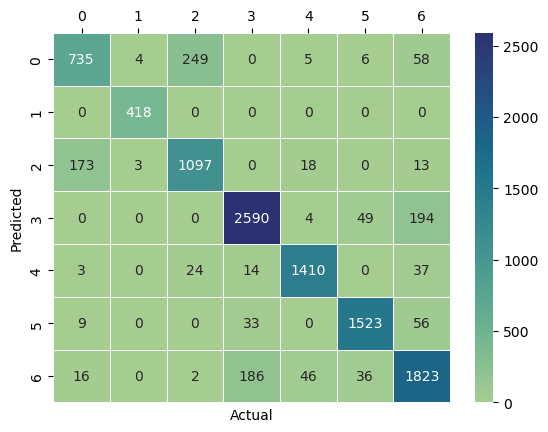

confusion Matrix - testing


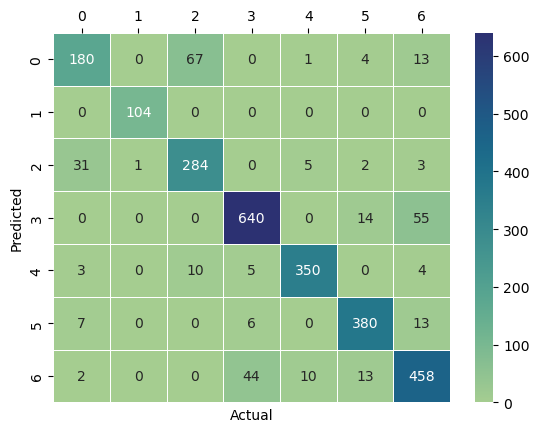

Accuracy Difference: 0.0013, Model Status: balanced
|   SLno | Model Name         |   Training Accuracy Score |   Testing Accuracy Score |   Training Recall Score |   Testing Recall Score |   Training Precision Score |   Testing Precision Score |   Training F1 Score |   Testing F1 Score | Cross Validation Used   | Smote used   | Model Fit Status   |
|-------:|:-------------------|--------------------------:|-------------------------:|------------------------:|-----------------------:|---------------------------:|--------------------------:|--------------------:|-------------------:|:------------------------|:-------------|:-------------------|
|      1 | LogisticRegression |                   0.88573 |                 0.884459 |                 0.88573 |               0.884459 |                   0.885525 |                   0.88506 |            0.886427 |           0.885934 | No                      | No           | balanced           |


In [42]:
lr = LogisticRegression()

param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

random_lr = RandomizedSearchCV(lr,param_distributions=param_grid,random_state=42,scoring='accuracy')
random_lr.fit(X_train,y_train)

random_lr_predict_train_y = random_lr.predict(X_train)
random_lr_predict_test_y = random_lr.predict(X_test)

evaluate_model(y_train, y_test, random_lr_predict_train_y, random_lr_predict_test_y, "LogisticRegression","No","No")

df_results = create_evaluation_dataframe(modelName, accuracy_score_train, accuracy_score_test,
                                recall_score_train, recall_score_test,
                                precision_score_train, precision_score_test,
                                f1_score_train, f1_score_test,CV_Used,smote_used,
                                model_fit_status)

df_report = generate_classification_report(y_train,y_test, random_lr_predict_train_y, random_lr_predict_test_y,model_name="LogisticRegression")
all_classification_reports.append(df_report)

In [43]:
df_results = df_results.round(3)
df_results

SLno          Model Name  Training Accuracy Score  Testing Accuracy Score  \
0     1  LogisticRegression                    0.886                   0.884   

   Training Recall Score  Testing Recall Score  Training Precision Score  \
0                  0.886                 0.884                     0.886   

   Testing Precision Score  Training F1 Score  Testing F1 Score  \
0                    0.885              0.886             0.886   

  Cross Validation Used Smote used Model Fit Status  
0                    No         No         balanced

confusion Matrix - training


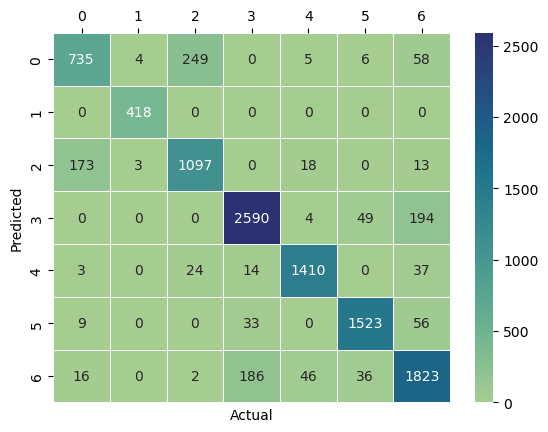

confusion Matrix - testing


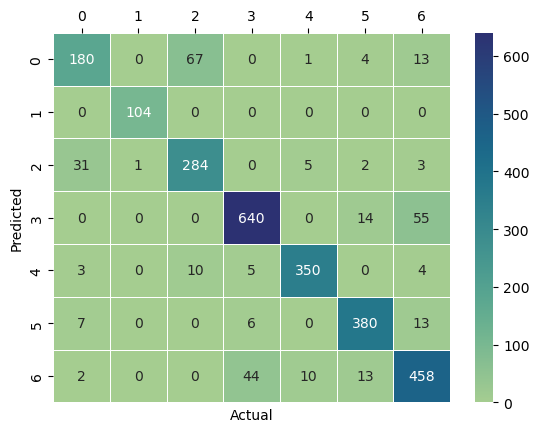

Accuracy Difference: 0.0013, Model Status: balanced
|   SLno | Model Name         |   Training Accuracy Score |   Testing Accuracy Score |   Training Recall Score |   Testing Recall Score |   Training Precision Score |   Testing Precision Score |   Training F1 Score |   Testing F1 Score | Cross Validation Used   | Smote used   | Model Fit Status   |
|-------:|:-------------------|--------------------------:|-------------------------:|------------------------:|-----------------------:|---------------------------:|--------------------------:|--------------------:|-------------------:|:------------------------|:-------------|:-------------------|
|      1 | LogisticRegression |                   0.88573 |                 0.884459 |                 0.88573 |               0.884459 |                   0.885525 |                   0.88506 |            0.886427 |           0.885934 | No                      | No           | balanced           |
|      2 | LogisticRegression |                 

In [44]:
#use stratified k fold

random_lr_cv = RandomizedSearchCV(lr,param_distributions=param_grid,cv=7,random_state=42,scoring='accuracy')
random_lr_cv.fit(X_train,y_train)
random_lr_predict_train_y = random_lr_cv.predict(X_train)
random_lr_predict_test_y = random_lr_cv.predict(X_test)

evaluate_model(y_train, y_test, random_lr_predict_train_y, random_lr_predict_test_y, "LogisticRegression","Yes","No")
df_results = create_evaluation_dataframe(modelName, accuracy_score_train, accuracy_score_test,
                                recall_score_train, recall_score_test,
                                precision_score_train, precision_score_test,
                                f1_score_train, f1_score_test,CV_Used,smote_used,
                                model_fit_status)

df_report = generate_classification_report(y_train,y_test, random_lr_predict_train_y, random_lr_predict_test_y ,model_name="LogisticRegression")
all_classification_reports.append(df_report)

In [45]:
df_results

SLno          Model Name  Training Accuracy Score  Testing Accuracy Score  \
0     1  LogisticRegression                    0.886                   0.884   
1     2  LogisticRegression                    0.886                   0.884   

   Training Recall Score  Testing Recall Score  Training Precision Score  \
0                  0.886                 0.884                     0.886   
1                  0.886                 0.884                     0.886   

   Testing Precision Score  Training F1 Score  Testing F1 Score  \
0                    0.885              0.886             0.886   
1                    0.885              0.886             0.886   

  Cross Validation Used Smote used Model Fit Status  
0                    No         No         balanced  
1                   Yes         No         balanced

In [46]:
print(random_lr.cv_results_['mean_test_score'])      # 5-fold results
print(random_lr_cv.cv_results_['mean_test_score'])   # 10-fold results
print(random_lr_cv.best_estimator_)
print(random_lr.best_estimator_)

[0.8292414  0.88573034 0.88573034 0.88369895 0.85490082 0.88573009
 0.88582264 0.88406881 0.85453152 0.85453152]
[0.8316413  0.88554557 0.88554557 0.88416052 0.85499256 0.88545341
 0.88554563 0.88397643 0.85480793 0.85480793]
LogisticRegression(C=1, solver='saga')
LogisticRegression(C=1, solver='saga')


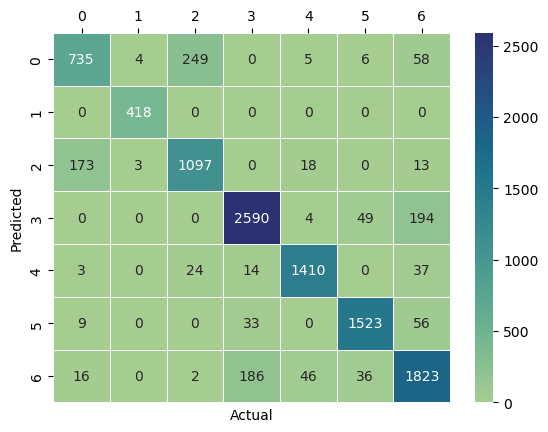

In [47]:
ax=sns.heatmap(confusion_matrix(y_train,random_lr_predict_train_y,labels=[0,1,2,3,4,5,6]),annot=True,linewidth=.5,cmap="crest",fmt='d',)
ax.set(xlabel="Actual",ylabel="Predicted")
ax.xaxis.tick_top()
plt.show()


### OBSERVATION

In [48]:
dtc = DecisionTreeClassifier(random_state=42)
path = dtc.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas  # List of alpha values to try




In [49]:
print(ccp_alphas.tolist())

[0.0, 6.153467478924374e-05, 6.153467478924374e-05, 6.153467478924374e-05, 6.153467478924374e-05, 6.153467478924374e-05, 6.153467478924374e-05, 6.153467478924374e-05, 6.92265091378992e-05, 6.92265091378992e-05, 6.92265091378992e-05, 6.92265091378992e-05, 6.92265091378992e-05, 6.92265091378992e-05, 6.92265091378992e-05, 6.92265091378992e-05, 6.92265091378992e-05, 7.179045392078436e-05, 7.384160974709247e-05, 7.384160974709247e-05, 7.384160974709247e-05, 7.384160974709247e-05, 7.384160974709247e-05, 7.384160974709247e-05, 7.384160974709247e-05, 7.384160974709247e-05, 7.384160974709247e-05, 7.384160974709247e-05, 7.55198281504355e-05, 7.691834348655468e-05, 7.691834348655468e-05, 7.691834348655468e-05, 7.691834348655468e-05, 7.691834348655468e-05, 7.691834348655468e-05, 7.691834348655468e-05, 7.691834348655468e-05, 7.810170261711705e-05, 7.911601044331339e-05, 7.911601044331339e-05, 7.911601044331339e-05, 7.911601044331339e-05, 7.911601044331339e-05, 7.911601044331339e-05, 7.9116010443313

confusion Matrix - training


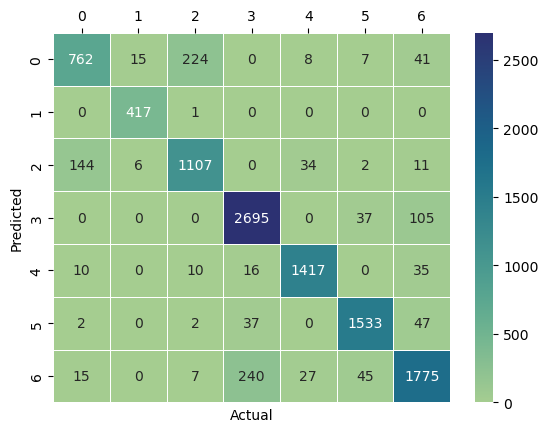

confusion Matrix - testing


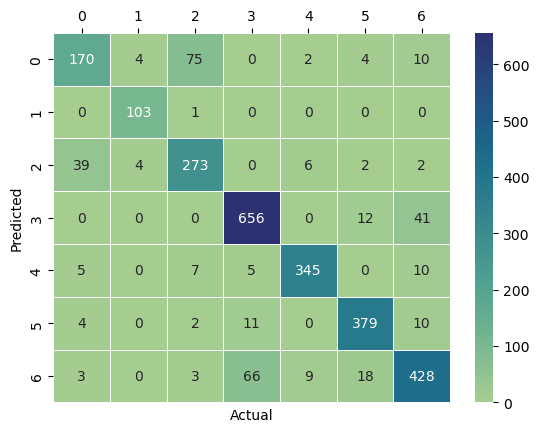

Accuracy Difference: 0.0269, Model Status: balanced
|   SLno | Model Name             |   Training Accuracy Score |   Testing Accuracy Score |   Training Recall Score |   Testing Recall Score |   Training Precision Score |   Testing Precision Score |   Training F1 Score |   Testing F1 Score | Cross Validation Used   | Smote used   | Model Fit Status   |
|-------:|:-----------------------|--------------------------:|-------------------------:|------------------------:|-----------------------:|---------------------------:|--------------------------:|--------------------:|-------------------:|:------------------------|:-------------|:-------------------|
|      1 | LogisticRegression     |                  0.88573  |                 0.884459 |                0.88573  |               0.884459 |                   0.885525 |                  0.88506  |            0.886427 |           0.885934 | No                      | No           | balanced           |
|      2 | LogisticRegression     | 

In [50]:
## Decision Tree classifier
dtc = DecisionTreeClassifier()
params = {
    'criterion':['gini','entropy'],
    'splitter':['best','random'],
    'max_depth':range(1,20),
    'min_samples_split':[2,4,6,8,10,12,14],
    'min_samples_leaf':[1,2,4,6,8,10,12,14],
    'ccp_alpha':ccp_alphas.tolist()
}

random_dtc = RandomizedSearchCV(dtc,param_distributions=params,random_state=42,scoring='accuracy')
random_dtc.fit(X_train,y_train)

random_dtc_predict_train_y = random_dtc.predict(X_train)
random_dtc_predict_test_y = random_dtc.predict(X_test)

evaluate_model(y_train, y_test, random_dtc_predict_train_y, random_dtc_predict_test_y, "DecisionTreeClassifier","No","No")
df_results = create_evaluation_dataframe(modelName, accuracy_score_train, accuracy_score_test,
                                recall_score_train, recall_score_test,
                                precision_score_train, precision_score_test,
                                f1_score_train, f1_score_test,CV_Used,smote_used,
                                model_fit_status)

df_report = generate_classification_report(y_train,y_test, random_dtc_predict_train_y, random_dtc_predict_test_y ,model_name="DecisionTreeClassifier")
all_classification_reports.append(df_report)

In [51]:
df_results

SLno              Model Name  Training Accuracy Score  \
0     1      LogisticRegression                    0.886   
1     2      LogisticRegression                    0.886   
2     3  DecisionTreeClassifier                    0.896   

   Testing Accuracy Score  Training Recall Score  Testing Recall Score  \
0                   0.884                  0.886                 0.884   
1                   0.884                  0.886                 0.884   
2                   0.869                  0.896                 0.869   

   Training Precision Score  Testing Precision Score  Training F1 Score  \
0                     0.886                    0.885              0.886   
1                     0.886                    0.885              0.886   
2                     0.895                    0.868              0.894   

   Testing F1 Score Cross Validation Used Smote used Model Fit Status  
0             0.886                    No         No         balanced  
1             0.886                   Yes         No         balanced  
2             0.865                    No         No         balanced

In [52]:
print(random_dtc.best_estimator_)
print(random_dtc.best_params_)

DecisionTreeClassifier(ccp_alpha=0.0005753891668604609, max_depth=16,
                       min_samples_leaf=6, min_samples_split=14)
{'splitter': 'best', 'min_samples_split': 14, 'min_samples_leaf': 6, 'max_depth': 16, 'criterion': 'gini', 'ccp_alpha': 0.0005753891668604609}


confusion Matrix - training


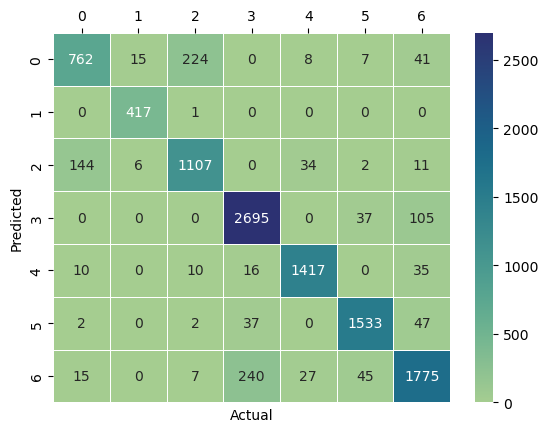

confusion Matrix - testing


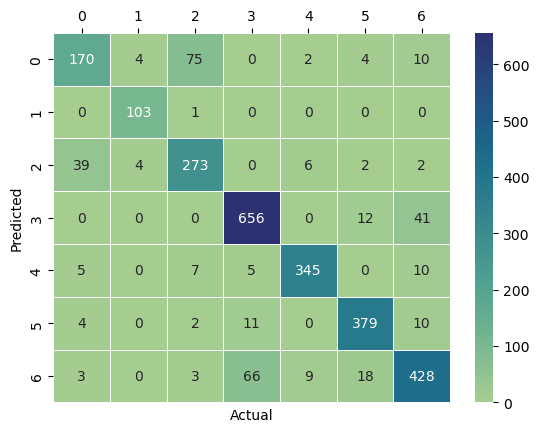

Accuracy Difference: 0.0269, Model Status: balanced
|   SLno | Model Name             |   Training Accuracy Score |   Testing Accuracy Score |   Training Recall Score |   Testing Recall Score |   Training Precision Score |   Testing Precision Score |   Training F1 Score |   Testing F1 Score | Cross Validation Used   | Smote used   | Model Fit Status   |
|-------:|:-----------------------|--------------------------:|-------------------------:|------------------------:|-----------------------:|---------------------------:|--------------------------:|--------------------:|-------------------:|:------------------------|:-------------|:-------------------|
|      1 | LogisticRegression     |                  0.88573  |                 0.884459 |                0.88573  |               0.884459 |                   0.885525 |                  0.88506  |            0.886427 |           0.885934 | No                      | No           | balanced           |
|      2 | LogisticRegression     | 

In [53]:
#Decision tree with CV

params_cv = {
    'criterion':['gini','entropy'],
    'splitter':['best','random'],
    'max_depth':range(1,20),
    'min_samples_split':[2,4,6,8,10,12,14],
    'min_samples_leaf':[1,2,4,6,8,10,12,14],
    'ccp_alpha':ccp_alphas.tolist()
}

skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

random_dtc_cv = RandomizedSearchCV(dtc,param_distributions=params,cv=skf,random_state=42,scoring='accuracy')
random_dtc_cv.fit(X_train,y_train)

random_dtc_cv_predict_train_y = random_dtc_cv.predict(X_train)
random_dtc_cv_predict_test_y = random_dtc_cv.predict(X_test)

evaluate_model(y_train, y_test, random_dtc_cv_predict_train_y, random_dtc_cv_predict_test_y, "DecisionTreeClassifier","Yes","No")
df_results = create_evaluation_dataframe(modelName, accuracy_score_train, accuracy_score_test,
                                recall_score_train, recall_score_test,
                                precision_score_train, precision_score_test,
                                f1_score_train, f1_score_test,CV_Used,smote_used,
                                model_fit_status)

df_report = generate_classification_report(y_train,y_test, random_dtc_cv_predict_train_y, random_dtc_cv_predict_test_y
                                           ,model_name="DecisionTreeClassifier")
all_classification_reports.append(df_report)


In [54]:
print(random_dtc_cv.best_estimator_)
print(random_dtc_cv.best_params_)

DecisionTreeClassifier(ccp_alpha=0.0005753891668604609, max_depth=16,
                       min_samples_leaf=6, min_samples_split=14)
{'splitter': 'best', 'min_samples_split': 14, 'min_samples_leaf': 6, 'max_depth': 16, 'criterion': 'gini', 'ccp_alpha': 0.0005753891668604609}


In [55]:
## RandomForest Classifier
rfc = RandomForestClassifier(random_state=42)

params_rfc = { 
    'n_estimators':range(10,250,20),
    'criterion':['gini','entropy'],
    'max_depth':range(1,20),
    'min_samples_split':[2,4,6,8,10,12,14],
    'min_samples_leaf':range(1,15),
    'max_samples':range(0, 15)
    }


In [56]:
 #considering ccp_alpha value from decision tree best param
rfc = RandomForestClassifier(bootstrap=True,oob_score=True,random_state=42,ccp_alpha=0.00032845435305467463)
random_rfc = RandomizedSearchCV(rfc,param_distributions=params_rfc,random_state=42,scoring='accuracy')
random_rfc.fit(X_train,y_train)

random_rfc_predict_train_y = random_rfc.predict(X_train)
random_rfc_predict_test_y = random_rfc.predict(X_test)

confusion Matrix - training


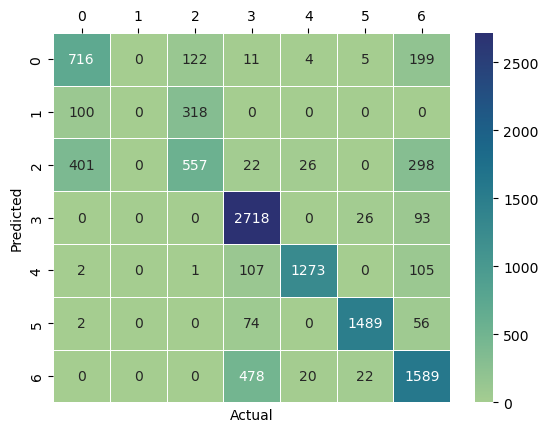

confusion Matrix - testing


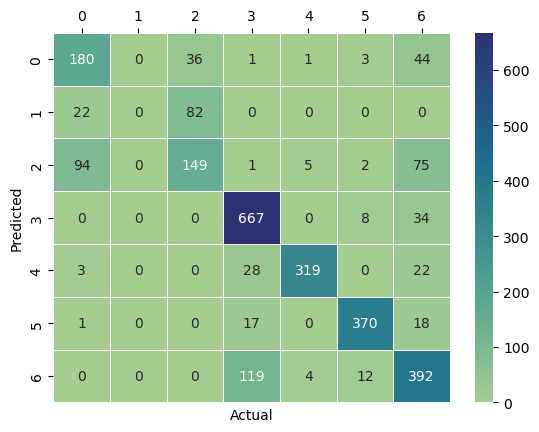

Accuracy Difference: 0.0033, Model Status: underfitting
|   SLno | Model Name             |   Training Accuracy Score |   Testing Accuracy Score |   Training Recall Score |   Testing Recall Score |   Training Precision Score |   Testing Precision Score |   Training F1 Score |   Testing F1 Score | Cross Validation Used   | Smote used   | Model Fit Status   |
|-------:|:-----------------------|--------------------------:|-------------------------:|------------------------:|-----------------------:|---------------------------:|--------------------------:|--------------------:|-------------------:|:------------------------|:-------------|:-------------------|
|      1 | LogisticRegression     |                  0.88573  |                 0.884459 |                0.88573  |               0.884459 |                   0.885525 |                  0.88506  |            0.886427 |           0.885934 | No                      | No           | balanced           |
|      2 | LogisticRegression   

In [57]:
evaluate_model(y_train, y_test, random_rfc_predict_train_y, random_rfc_predict_test_y, "RandomForestClassifier","No","No")
df_results = create_evaluation_dataframe(modelName, accuracy_score_train, accuracy_score_test,
                                recall_score_train, recall_score_test,
                                precision_score_train, precision_score_test,
                                f1_score_train, f1_score_test,CV_Used,smote_used,
                                model_fit_status)

df_report = generate_classification_report(y_train,y_test, random_rfc_predict_train_y, random_rfc_predict_test_y
                                           ,model_name="RandomForestClassifier")
all_classification_reports.append(df_report)


In [58]:



results = []

for i in range(5, 15):
    skf = StratifiedKFold(n_splits=i, shuffle=True, random_state=42)
    
    random_rfc_cv = RandomizedSearchCV(
        estimator=rfc,
        param_distributions=params_rfc,
        cv=skf,
        scoring='accuracy',
        random_state=42,
        n_iter=15,  # Optional: reduce to speed up
        n_jobs=-1
    )
    
    random_rfc_cv.fit(X_train, y_train)
    
    train_score = random_rfc_cv.score(X_train, y_train)
    test_score = random_rfc_cv.score(X_test, y_test)
    
    results.append({
        'cv_folds': i,
        'best_score': random_rfc_cv.best_score_,
        'train_acc': train_score,
        'test_acc': test_score,
        'best_params': random_rfc_cv.best_params_
    })

df_cv_results = pd.DataFrame(results)
print(df_cv_results)

## For each CV giving same result so taking cv as 7 

   cv_folds  best_score  train_acc  test_acc  \
0         5    0.780227   0.769983  0.766704   
1         6    0.783922   0.769983  0.766704   
2         7    0.778014   0.769983  0.766704   
3         8    0.770905   0.769983  0.766704   
4         9    0.778473   0.769983  0.766704   
5        10    0.786419   0.769983  0.766704   
6        11    0.779397   0.769983  0.766704   
7        12    0.784566   0.769983  0.766704   
8        13    0.778382   0.769983  0.766704   
9        14    0.782536   0.769983  0.766704   

                                         best_params  
0  {'n_estimators': 130, 'min_samples_split': 4, ...  
1  {'n_estimators': 130, 'min_samples_split': 4, ...  
2  {'n_estimators': 130, 'min_samples_split': 4, ...  
3  {'n_estimators': 130, 'min_samples_split': 4, ...  
4  {'n_estimators': 130, 'min_samples_split': 4, ...  
5  {'n_estimators': 130, 'min_samples_split': 4, ...  
6  {'n_estimators': 130, 'min_samples_split': 4, ...  
7  {'n_estimators': 130, 'min_s

confusion Matrix - training


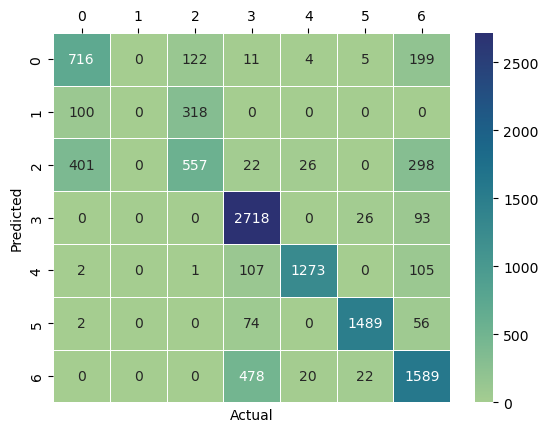

confusion Matrix - testing


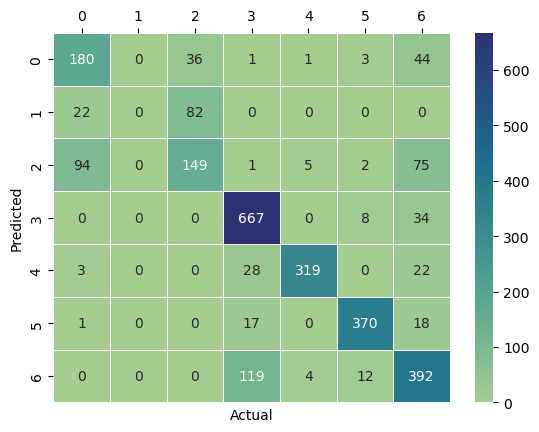

Accuracy Difference: 0.0033, Model Status: underfitting
|   SLno | Model Name             |   Training Accuracy Score |   Testing Accuracy Score |   Training Recall Score |   Testing Recall Score |   Training Precision Score |   Testing Precision Score |   Training F1 Score |   Testing F1 Score | Cross Validation Used   | Smote used   | Model Fit Status   |
|-------:|:-----------------------|--------------------------:|-------------------------:|------------------------:|-----------------------:|---------------------------:|--------------------------:|--------------------:|-------------------:|:------------------------|:-------------|:-------------------|
|      1 | LogisticRegression     |                  0.88573  |                 0.884459 |                0.88573  |               0.884459 |                   0.885525 |                  0.88506  |            0.886427 |           0.885934 | No                      | No           | balanced           |
|      2 | LogisticRegression   

In [59]:
 #considering ccp_alpha value from decision tree best param with CV
rfc = RandomForestClassifier(bootstrap=True,oob_score=True,random_state=42,ccp_alpha=0.00032845435305467463)

skf = StratifiedKFold(n_splits=7, shuffle=True, random_state=42)
random_rfc_cv = RandomizedSearchCV(rfc,param_distributions=params_rfc,random_state=42,cv=skf,scoring='accuracy')
random_rfc_cv.fit(X_train,y_train)

random_rfc_cv_predict_train_y = random_rfc_cv.predict(X_train)
random_rfc_cv_predict_test_y = random_rfc_cv.predict(X_test)

evaluate_model(y_train, y_test, random_rfc_cv_predict_train_y, random_rfc_cv_predict_test_y, "RandomForestClassifier","Yes","No")
df_results = create_evaluation_dataframe(modelName, accuracy_score_train, accuracy_score_test,
                                recall_score_train, recall_score_test,
                                precision_score_train, precision_score_test,
                                f1_score_train, f1_score_test,CV_Used,smote_used,
                                model_fit_status)

df_report = generate_classification_report(y_train,y_test, random_rfc_cv_predict_train_y, random_rfc_cv_predict_test_y
                                           ,model_name="RandomForestClassifier")
all_classification_reports.append(df_report)


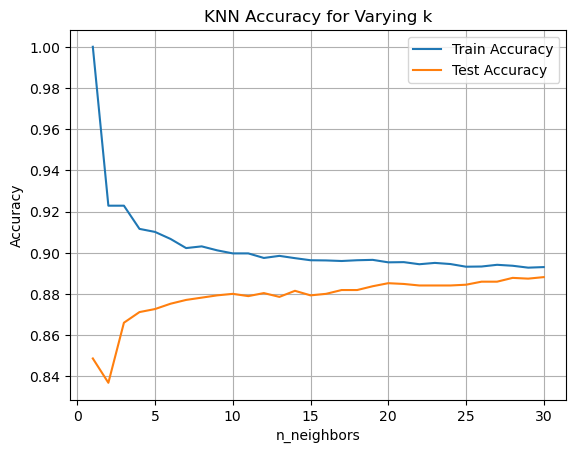

In [60]:
train_acc = []
test_acc = []
k_range = range(1, 31)

for k in k_range:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    train_acc.append(model.score(X_train, y_train))
    test_acc.append(model.score(X_test, y_test))

plt.plot(k_range, train_acc, label='Train Accuracy')
plt.plot(k_range, test_acc, label='Test Accuracy')
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy for Varying k')
plt.legend()
plt.grid(True)
plt.show()


confusion Matrix - training


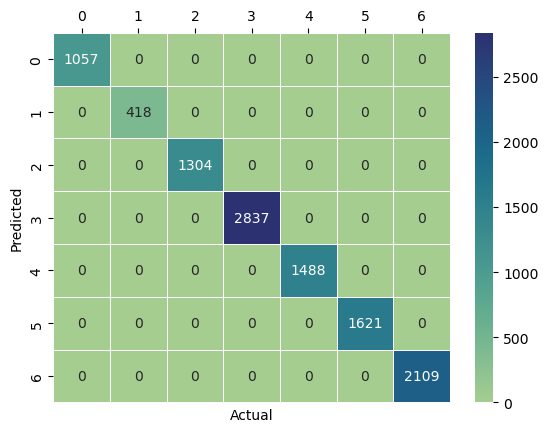

confusion Matrix - testing


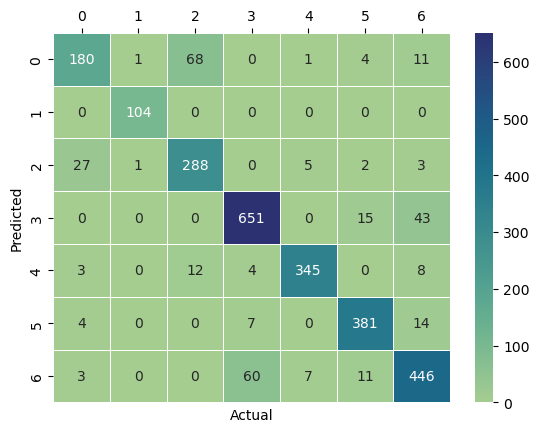

Accuracy Difference: 0.1159, Model Status: overfitting
|   SLno | Model Name             |   Training Accuracy Score |   Testing Accuracy Score |   Training Recall Score |   Testing Recall Score |   Training Precision Score |   Testing Precision Score |   Training F1 Score |   Testing F1 Score | Cross Validation Used   | Smote used   | Model Fit Status   |
|-------:|:-----------------------|--------------------------:|-------------------------:|------------------------:|-----------------------:|---------------------------:|--------------------------:|--------------------:|-------------------:|:------------------------|:-------------|:-------------------|
|      1 | LogisticRegression     |                  0.88573  |                 0.884459 |                0.88573  |               0.884459 |                   0.885525 |                  0.88506  |            0.886427 |           0.885934 | No                      | No           | balanced           |
|      2 | LogisticRegression    

In [61]:
### KNN , considering number of neighbors as 11 from above graph 

knc = KNeighborsClassifier(n_neighbors=11)
params_knn = {
    'n_neighbors': range(1, 31),
    'weights': ['uniform', 'distance'],
    'metric': ['minkowski'],
    'p': [1, 2]  # 1=Manhattan, 2=Euclidean
}

random_knc = RandomizedSearchCV(knc,param_distributions=params_knn,random_state=42,scoring='accuracy')

random_knc.fit(X_train,y_train)

random_knc_predict_train_y = random_knc.predict(X_train)
random_knc_predict_test_y = random_knc.predict(X_test)

evaluate_model(y_train, y_test, random_knc_predict_train_y, random_knc_predict_test_y, "KNeighboursClassifier","No","No")
df_results = create_evaluation_dataframe(modelName, accuracy_score_train, accuracy_score_test,
                                recall_score_train, recall_score_test,
                                precision_score_train, precision_score_test,
                                f1_score_train, f1_score_test,CV_Used,smote_used,
                                model_fit_status)

df_report = generate_classification_report(y_train,y_test, random_knc_predict_train_y, random_knc_predict_test_y
                                           ,model_name="KNeighboursClassifier")

all_classification_reports.append(df_report)


In [62]:
df_results

SLno              Model Name  Training Accuracy Score  \
0     1      LogisticRegression                    0.886   
1     2      LogisticRegression                    0.886   
2     3  DecisionTreeClassifier                    0.896   
3     4  DecisionTreeClassifier                    0.896   
4     5  RandomForestClassifier                    0.770   
5     6  RandomForestClassifier                    0.770   
6     7   KNeighboursClassifier                    1.000   

   Testing Accuracy Score  Training Recall Score  Testing Recall Score  \
0                   0.884                  0.886                 0.884   
1                   0.884                  0.886                 0.884   
2                   0.869                  0.896                 0.869   
3                   0.869                  0.896                 0.869   
4                   0.767                  0.770                 0.767   
5                   0.767                  0.770                 0.767   
6                   0.884                  1.000                 0.884   

   Training Precision Score  Testing Precision Score  Training F1 Score  \
0                     0.886                    0.885              0.886   
1                     0.886                    0.885              0.886   
2                     0.895                    0.868              0.894   
3                     0.895                    0.868              0.894   
4                     0.742                    0.739              0.649   
5                     0.742                    0.739              0.649   
6                     1.000                    0.885              1.000   

   Testing F1 Score Cross Validation Used Smote used Model Fit Status  
0             0.886                    No         No         balanced  
1             0.886                   Yes         No         balanced  
2             0.865                    No         No         balanced  
3             0.865                   Yes         No         balanced  
4             0.649                    No         No     underfitting  
5             0.649                   Yes         No     underfitting  
6             0.886                    No         No      overfitting

confusion Matrix - training


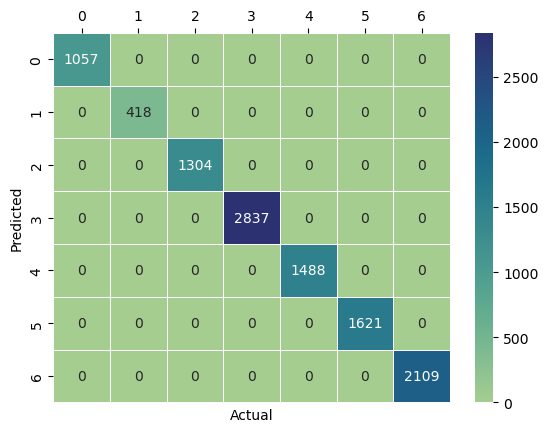

confusion Matrix - testing


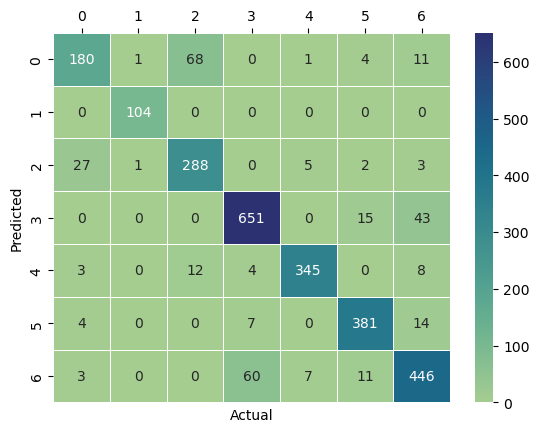

Accuracy Difference: 0.1159, Model Status: overfitting
|   SLno | Model Name             |   Training Accuracy Score |   Testing Accuracy Score |   Training Recall Score |   Testing Recall Score |   Training Precision Score |   Testing Precision Score |   Training F1 Score |   Testing F1 Score | Cross Validation Used   | Smote used   | Model Fit Status   |
|-------:|:-----------------------|--------------------------:|-------------------------:|------------------------:|-----------------------:|---------------------------:|--------------------------:|--------------------:|-------------------:|:------------------------|:-------------|:-------------------|
|      1 | LogisticRegression     |                  0.88573  |                 0.884459 |                0.88573  |               0.884459 |                   0.885525 |                  0.88506  |            0.886427 |           0.885934 | No                      | No           | balanced           |
|      2 | LogisticRegression    

In [63]:
### KNN , considering number of neighbors as 11 from above graph 
## with cross fold 
knc = KNeighborsClassifier(n_neighbors=11)
params_knn = {
    'n_neighbors': range(1, 31),
    'weights': ['uniform', 'distance'],
    'metric': ['minkowski'],
    'p': [1, 2]  # 1=Manhattan, 2=Euclidean
}
skf = StratifiedKFold(n_splits=7, shuffle=True, random_state=42)

random_knc_cv = RandomizedSearchCV(knc,param_distributions=params_knn,cv=skf,random_state=42,scoring='accuracy')

random_knc_cv.fit(X_train,y_train)

random_knc_cv_predict_train_y = random_knc_cv.predict(X_train)
random_knc_cv_predict_test_y = random_knc_cv.predict(X_test)

evaluate_model(y_train, y_test, random_knc_cv_predict_train_y, random_knc_cv_predict_test_y, "KNeighboursClassifier","Yes","No")
df_results = create_evaluation_dataframe(modelName, accuracy_score_train, accuracy_score_test,
                                recall_score_train, recall_score_test,
                                precision_score_train, precision_score_test,
                                f1_score_train, f1_score_test,CV_Used,smote_used,
                                model_fit_status)

df_report = generate_classification_report(y_train,y_test, random_knc_cv_predict_train_y, random_knc_cv_predict_test_y
                                           ,model_name="KNeighboursClassifier")
all_classification_reports.append(df_report)


In [64]:
df_results

SLno              Model Name  Training Accuracy Score  \
0     1      LogisticRegression                    0.886   
1     2      LogisticRegression                    0.886   
2     3  DecisionTreeClassifier                    0.896   
3     4  DecisionTreeClassifier                    0.896   
4     5  RandomForestClassifier                    0.770   
5     6  RandomForestClassifier                    0.770   
6     7   KNeighboursClassifier                    1.000   
7     8   KNeighboursClassifier                    1.000   

   Testing Accuracy Score  Training Recall Score  Testing Recall Score  \
0                   0.884                  0.886                 0.884   
1                   0.884                  0.886                 0.884   
2                   0.869                  0.896                 0.869   
3                   0.869                  0.896                 0.869   
4                   0.767                  0.770                 0.767   
5                   0.767                  0.770                 0.767   
6                   0.884                  1.000                 0.884   
7                   0.884                  1.000                 0.884   

   Training Precision Score  Testing Precision Score  Training F1 Score  \
0                     0.886                    0.885              0.886   
1                     0.886                    0.885              0.886   
2                     0.895                    0.868              0.894   
3                     0.895                    0.868              0.894   
4                     0.742                    0.739              0.649   
5                     0.742                    0.739              0.649   
6                     1.000                    0.885              1.000   
7                     1.000                    0.885              1.000   

   Testing F1 Score Cross Validation Used Smote used Model Fit Status  
0             0.886                    No         No         balanced  
1             0.886                   Yes         No         balanced  
2             0.865                    No         No         balanced  
3             0.865                   Yes         No         balanced  
4             0.649                    No         No     underfitting  
5             0.649                   Yes         No     underfitting  
6             0.886                    No         No      overfitting  
7             0.886                   Yes         No      overfitting

confusion Matrix - training


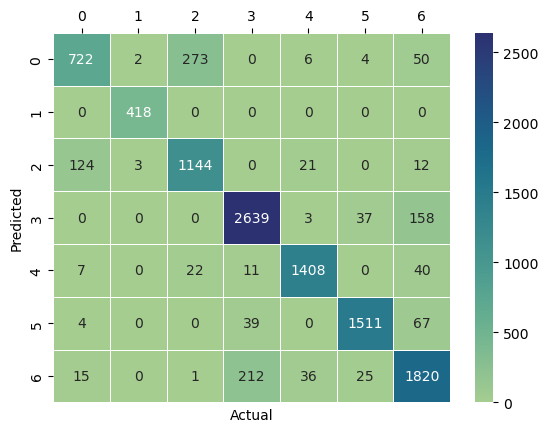

confusion Matrix - testing


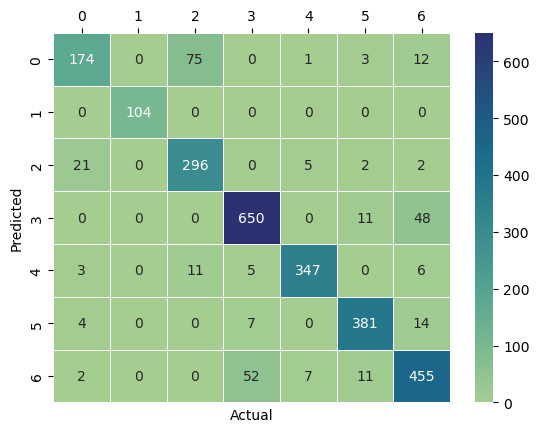

Accuracy Difference: 0.0033, Model Status: balanced
|   SLno | Model Name                  |   Training Accuracy Score |   Testing Accuracy Score |   Training Recall Score |   Testing Recall Score |   Training Precision Score |   Testing Precision Score |   Training F1 Score |   Testing F1 Score | Cross Validation Used   | Smote used   | Model Fit Status   |
|-------:|:----------------------------|--------------------------:|-------------------------:|------------------------:|-----------------------:|---------------------------:|--------------------------:|--------------------:|-------------------:|:------------------------|:-------------|:-------------------|
|      1 | LogisticRegression          |                  0.88573  |                 0.884459 |                0.88573  |               0.884459 |                   0.885525 |                  0.88506  |            0.886427 |           0.885934 | No                      | No           | balanced           |
|      2 | LogisticRe

In [65]:
### SVM
svc = SVC(random_state=42)
svc.fit(X_train,y_train)

random_svc_predict_train_y = svc.predict(X_train)
random_svc_predict_test_y = svc.predict(X_test)


evaluate_model(y_train, y_test, random_svc_predict_train_y, random_svc_predict_test_y, "SupportVectorClassification","No","No")
df_results = create_evaluation_dataframe(modelName, accuracy_score_train, accuracy_score_test,
                                recall_score_train, recall_score_test,
                                precision_score_train, precision_score_test,
                                f1_score_train, f1_score_test,CV_Used,smote_used,
                                model_fit_status)

df_report = generate_classification_report(y_train,y_test, random_svc_predict_train_y, random_svc_predict_test_y
                                           ,model_name="KNeighboursClassifier")
all_classification_reports.append(df_report)


In [66]:
df_results

SLno                   Model Name  Training Accuracy Score  \
0     1           LogisticRegression                    0.886   
1     2           LogisticRegression                    0.886   
2     3       DecisionTreeClassifier                    0.896   
3     4       DecisionTreeClassifier                    0.896   
4     5       RandomForestClassifier                    0.770   
5     6       RandomForestClassifier                    0.770   
6     7        KNeighboursClassifier                    1.000   
7     8        KNeighboursClassifier                    1.000   
8     9  SupportVectorClassification                    0.892   

   Testing Accuracy Score  Training Recall Score  Testing Recall Score  \
0                   0.884                  0.886                 0.884   
1                   0.884                  0.886                 0.884   
2                   0.869                  0.896                 0.869   
3                   0.869                  0.896                 0.869   
4                   0.767                  0.770                 0.767   
5                   0.767                  0.770                 0.767   
6                   0.884                  1.000                 0.884   
7                   0.884                  1.000                 0.884   
8                   0.889                  0.892                 0.889   

   Training Precision Score  Testing Precision Score  Training F1 Score  \
0                     0.886                    0.885              0.886   
1                     0.886                    0.885              0.886   
2                     0.895                    0.868              0.894   
3                     0.895                    0.868              0.894   
4                     0.742                    0.739              0.649   
5                     0.742                    0.739              0.649   
6                     1.000                    0.885              1.000   
7                     1.000                    0.885              1.000   
8                     0.892                    0.890              0.892   

   Testing F1 Score Cross Validation Used Smote used Model Fit Status  
0             0.886                    No         No         balanced  
1             0.886                   Yes         No         balanced  
2             0.865                    No         No         balanced  
3             0.865                   Yes         No         balanced  
4             0.649                    No         No     underfitting  
5             0.649                   Yes         No     underfitting  
6             0.886                    No         No      overfitting  
7             0.886                   Yes         No      overfitting  
8             0.890                    No         No         balanced

In [67]:
df_results

SLno                   Model Name  Training Accuracy Score  \
0     1           LogisticRegression                    0.886   
1     2           LogisticRegression                    0.886   
2     3       DecisionTreeClassifier                    0.896   
3     4       DecisionTreeClassifier                    0.896   
4     5       RandomForestClassifier                    0.770   
5     6       RandomForestClassifier                    0.770   
6     7        KNeighboursClassifier                    1.000   
7     8        KNeighboursClassifier                    1.000   
8     9  SupportVectorClassification                    0.892   

   Testing Accuracy Score  Training Recall Score  Testing Recall Score  \
0                   0.884                  0.886                 0.884   
1                   0.884                  0.886                 0.884   
2                   0.869                  0.896                 0.869   
3                   0.869                  0.896                 0.869   
4                   0.767                  0.770                 0.767   
5                   0.767                  0.770                 0.767   
6                   0.884                  1.000                 0.884   
7                   0.884                  1.000                 0.884   
8                   0.889                  0.892                 0.889   

   Training Precision Score  Testing Precision Score  Training F1 Score  \
0                     0.886                    0.885              0.886   
1                     0.886                    0.885              0.886   
2                     0.895                    0.868              0.894   
3                     0.895                    0.868              0.894   
4                     0.742                    0.739              0.649   
5                     0.742                    0.739              0.649   
6                     1.000                    0.885              1.000   
7                     1.000                    0.885              1.000   
8                     0.892                    0.890              0.892   

   Testing F1 Score Cross Validation Used Smote used Model Fit Status  
0             0.886                    No         No         balanced  
1             0.886                   Yes         No         balanced  
2             0.865                    No         No         balanced  
3             0.865                   Yes         No         balanced  
4             0.649                    No         No     underfitting  
5             0.649                   Yes         No     underfitting  
6             0.886                    No         No      overfitting  
7             0.886                   Yes         No      overfitting  
8             0.890                    No         No         balanced

In [68]:
### Naive Baye's 
gnb = GaussianNB()
param_grid = {
    'var_smoothing': np.logspace(-12, -6, 20) 
}

skf = StratifiedKFold(n_splits=25,shuffle=True, random_state=42)

random_gnb_cv = RandomizedSearchCV(gnb,param_distributions=param_grid,cv=skf,random_state=42,scoring='accuracy')

random_gnb_cv.fit(X_train,y_train)

random_gnb_cv_predict_train_y = random_gnb_cv.predict(X_train)
random_gnb_cv_predict_test_y = random_gnb_cv.predict(X_test)

print(random_gnb_cv.best_estimator_)
print(random_gnb_cv.best_params_)
print(random_gnb_cv.best_score_)

GaussianNB(var_smoothing=1e-12)
{'var_smoothing': 1e-12}
0.8765890103340749


confusion Matrix - training


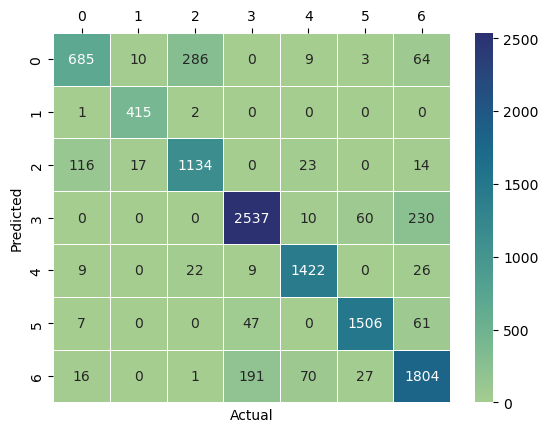

confusion Matrix - testing


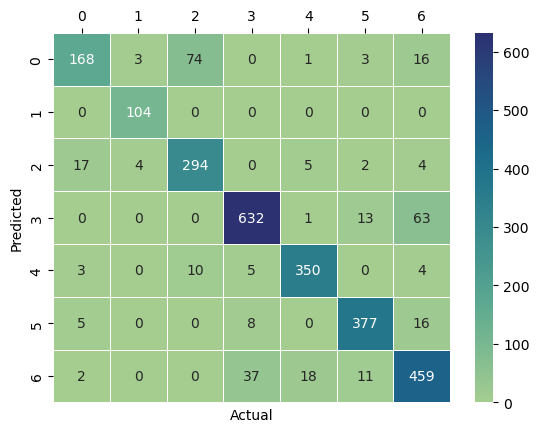

Accuracy Difference: 0.0029, Model Status: balanced
|   SLno | Model Name                  |   Training Accuracy Score |   Testing Accuracy Score |   Training Recall Score |   Testing Recall Score |   Training Precision Score |   Testing Precision Score |   Training F1 Score |   Testing F1 Score | Cross Validation Used   | Smote used   | Model Fit Status   |
|-------:|:----------------------------|--------------------------:|-------------------------:|------------------------:|-----------------------:|---------------------------:|--------------------------:|--------------------:|-------------------:|:------------------------|:-------------|:-------------------|
|      1 | LogisticRegression          |                  0.88573  |                 0.884459 |                0.88573  |               0.884459 |                   0.885525 |                  0.88506  |            0.886427 |           0.885934 | No                      | No           | balanced           |
|      2 | LogisticRe

In [69]:
evaluate_model(y_train, y_test, random_gnb_cv_predict_train_y, random_gnb_cv_predict_test_y, "GaussianNB","Yes","No")
df_results = create_evaluation_dataframe(modelName, accuracy_score_train, accuracy_score_test,
                                recall_score_train, recall_score_test,
                                precision_score_train, precision_score_test,
                                f1_score_train, f1_score_test,CV_Used,smote_used,
                                model_fit_status)

df_report = generate_classification_report(y_train,y_test, random_gnb_cv_predict_train_y, random_gnb_cv_predict_test_y
                                           ,model_name="GaussianNB")
all_classification_reports.append(df_report)


In [70]:
df_results

SLno                   Model Name  Training Accuracy Score  \
0     1           LogisticRegression                    0.886   
1     2           LogisticRegression                    0.886   
2     3       DecisionTreeClassifier                    0.896   
3     4       DecisionTreeClassifier                    0.896   
4     5       RandomForestClassifier                    0.770   
5     6       RandomForestClassifier                    0.770   
6     7        KNeighboursClassifier                    1.000   
7     8        KNeighboursClassifier                    1.000   
8     9  SupportVectorClassification                    0.892   
9    10                   GaussianNB                    0.877   

   Testing Accuracy Score  Training Recall Score  Testing Recall Score  \
0                   0.884                  0.886                 0.884   
1                   0.884                  0.886                 0.884   
2                   0.869                  0.896                 0.869   
3                   0.869                  0.896                 0.869   
4                   0.767                  0.770                 0.767   
5                   0.767                  0.770                 0.767   
6                   0.884                  1.000                 0.884   
7                   0.884                  1.000                 0.884   
8                   0.889                  0.892                 0.889   
9                   0.880                  0.877                 0.880   

   Training Precision Score  Testing Precision Score  Training F1 Score  \
0                     0.886                    0.885              0.886   
1                     0.886                    0.885              0.886   
2                     0.895                    0.868              0.894   
3                     0.895                    0.868              0.894   
4                     0.742                    0.739              0.649   
5                     0.742                    0.739              0.649   
6                     1.000                    0.885              1.000   
7                     1.000                    0.885              1.000   
8                     0.892                    0.890              0.892   
9                     0.878                    0.883              0.876   

   Testing F1 Score Cross Validation Used Smote used Model Fit Status  
0             0.886                    No         No         balanced  
1             0.886                   Yes         No         balanced  
2             0.865                    No         No         balanced  
3             0.865                   Yes         No         balanced  
4             0.649                    No         No     underfitting  
5             0.649                   Yes         No     underfitting  
6             0.886                    No         No      overfitting  
7             0.886                   Yes         No      overfitting  
8             0.890                    No         No         balanced  
9             0.879                   Yes         No         balanced

In [73]:
## Viting claasification 
vc = VotingClassifier(estimators=[('knn',random_knc_cv),('naive-bayes',random_gnb_cv)],voting='hard')
vc.fit(X_train,y_train)

random_vc_predict_train_y = vc.predict(X_train)
random_vc_predict_test_y = vc.predict(X_test)

print(vc.estimators_)
print(vc.get_params)


[RandomizedSearchCV(cv=StratifiedKFold(n_splits=7, random_state=42, shuffle=True),
                   estimator=KNeighborsClassifier(n_neighbors=11),
                   param_distributions={'metric': ['minkowski'],
                                        'n_neighbors': range(1, 31),
                                        'p': [1, 2],
                                        'weights': ['uniform', 'distance']},
                   random_state=42, scoring='accuracy'), RandomizedSearchCV(cv=StratifiedKFold(n_splits=25, random_state=42, shuffle=True),
                   estimator=GaussianNB(),
                   param_distributions={'var_smoothing': array([1.00000000e-12, 2.06913808e-12, 4.28133240e-12, 8.85866790e-12,
       1.83298071e-11, 3.79269019e-11, 7.84759970e-11, 1.62377674e-10,
       3.35981829e-10, 6.95192796e-10, 1.43844989e-09, 2.97635144e-09,
       6.15848211e-09, 1.27427499e-08, 2.63665090e-08, 5.45559478e-08,
       1.12883789e-07, 2.33572147e-07, 4.83293024e-07, 1.00000

confusion Matrix - training


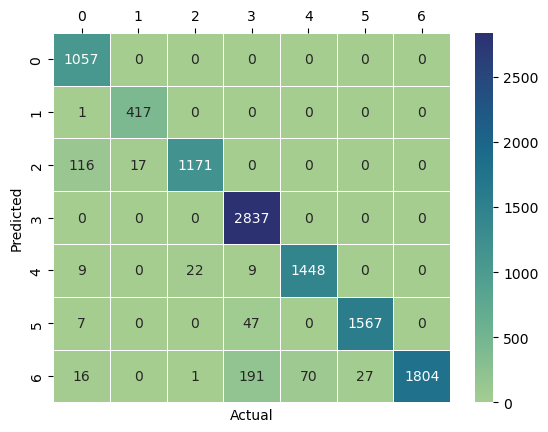

confusion Matrix - testing


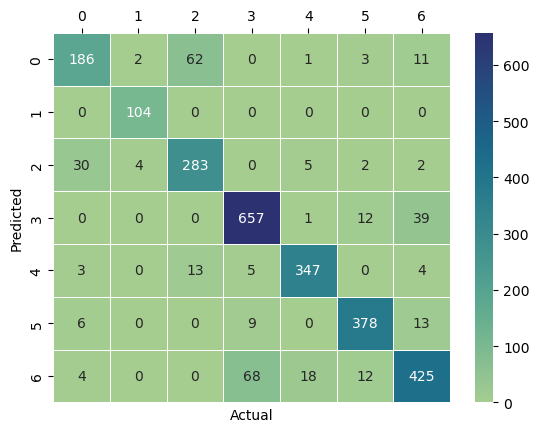

Accuracy Difference: 0.0723, Model Status: balanced
|   SLno | Model Name                  |   Training Accuracy Score |   Testing Accuracy Score |   Training Recall Score |   Testing Recall Score |   Training Precision Score |   Testing Precision Score |   Training F1 Score |   Testing F1 Score | Cross Validation Used   | Smote used   | Model Fit Status   |
|-------:|:----------------------------|--------------------------:|-------------------------:|------------------------:|-----------------------:|---------------------------:|--------------------------:|--------------------:|-------------------:|:------------------------|:-------------|:-------------------|
|      1 | LogisticRegression          |                  0.88573  |                 0.884459 |                0.88573  |               0.884459 |                   0.885525 |                  0.88506  |            0.886427 |           0.885934 | No                      | No           | balanced           |
|      2 | LogisticRe

In [74]:
evaluate_model(y_train, y_test, random_vc_predict_train_y, random_vc_predict_test_y, "VotingClassifier","No","No")
df_results = create_evaluation_dataframe(modelName, accuracy_score_train, accuracy_score_test,
                                recall_score_train, recall_score_test,
                                precision_score_train, precision_score_test,
                                f1_score_train, f1_score_test,CV_Used,smote_used,
                                model_fit_status)

df_report = generate_classification_report(y_train,y_test, random_vc_predict_train_y, random_vc_predict_test_y
                                           ,model_name="VotingClassifier")
all_classification_reports.append(df_report)


confusion Matrix - training


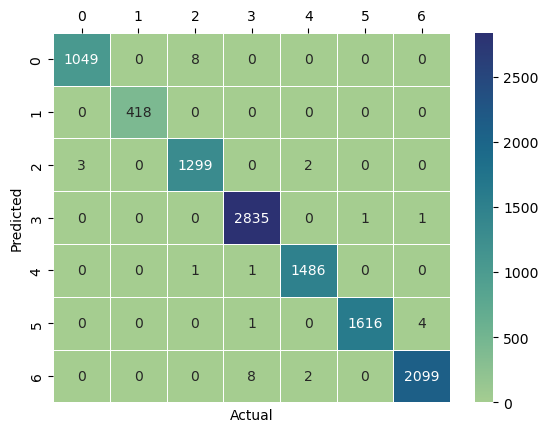

confusion Matrix - testing


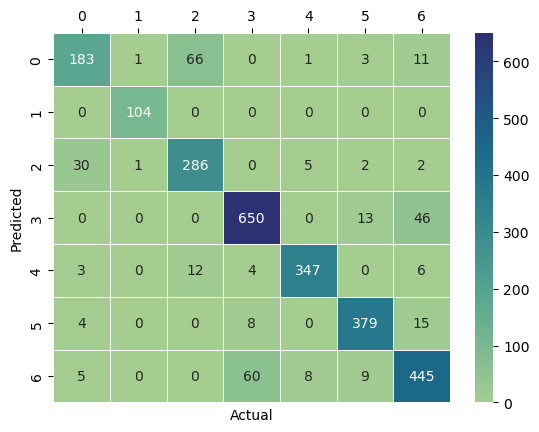

Accuracy Difference: 0.1133, Model Status: balanced
|   SLno | Model Name                  |   Training Accuracy Score |   Testing Accuracy Score |   Training Recall Score |   Testing Recall Score |   Training Precision Score |   Testing Precision Score |   Training F1 Score |   Testing F1 Score | Cross Validation Used   | Smote used   | Model Fit Status   |
|-------:|:----------------------------|--------------------------:|-------------------------:|------------------------:|-----------------------:|---------------------------:|--------------------------:|--------------------:|-------------------:|:------------------------|:-------------|:-------------------|
|      1 | LogisticRegression          |                  0.88573  |                 0.884459 |                0.88573  |               0.884459 |                   0.885525 |                  0.88506  |            0.886427 |           0.885934 | No                      | No           | balanced           |
|      2 | LogisticRe

In [75]:
## Bagging 

bgc = BaggingClassifier(estimator=random_knc_cv)
bgc.fit(X_train,y_train)

random_bgc_predict_train_y = bgc.predict(X_train)
random_bgc_predict_test_y = bgc.predict(X_test)

evaluate_model(y_train, y_test, random_bgc_predict_train_y, random_bgc_predict_test_y, "BaggingClassifier","No","No")
df_results = create_evaluation_dataframe(modelName, accuracy_score_train, accuracy_score_test,
                                recall_score_train, recall_score_test,
                                precision_score_train, precision_score_test,
                                f1_score_train, f1_score_test,CV_Used,smote_used,
                                model_fit_status)

df_report = generate_classification_report(y_train,y_test,random_bgc_predict_train_y, random_bgc_predict_test_y
                                           ,model_name="BaggingClassifier")
all_classification_reports.append(df_report)


In [76]:
skf = StratifiedKFold(n_splits=7,shuffle=True, random_state=42)
param_grid = {
    'n_estimators':[10,15]
}
bgc = BaggingClassifier(estimator=random_knc_cv,bootstrap=True)


random_bgc_cv = RandomizedSearchCV(bgc,param_distributions=param_grid,cv=skf,random_state=42,scoring='accuracy')

random_bgc_cv.fit(X_train,y_train)

random_bgc_cv_predict_train_y = random_bgc_cv.predict(X_train)
random_bgc_cv_predict_test_y = random_bgc_cv.predict(X_test)





confusion Matrix - training


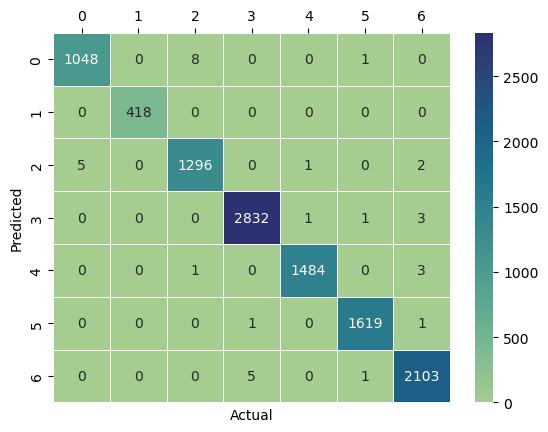

confusion Matrix - testing


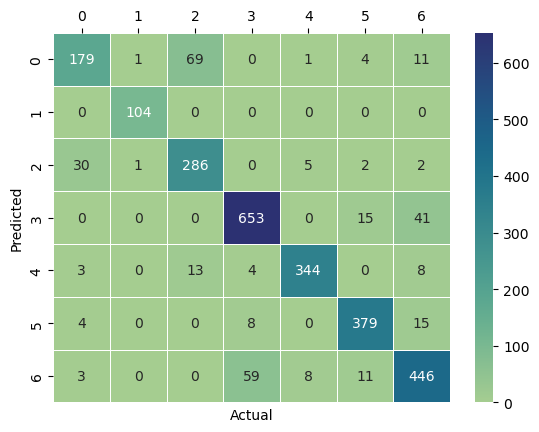

Accuracy Difference: 0.1142, Model Status: balanced
|   SLno | Model Name                  |   Training Accuracy Score |   Testing Accuracy Score |   Training Recall Score |   Testing Recall Score |   Training Precision Score |   Testing Precision Score |   Training F1 Score |   Testing F1 Score | Cross Validation Used   | Smote used   | Model Fit Status   |
|-------:|:----------------------------|--------------------------:|-------------------------:|------------------------:|-----------------------:|---------------------------:|--------------------------:|--------------------:|-------------------:|:------------------------|:-------------|:-------------------|
|      1 | LogisticRegression          |                  0.88573  |                 0.884459 |                0.88573  |               0.884459 |                   0.885525 |                  0.88506  |            0.886427 |           0.885934 | No                      | No           | balanced           |
|      2 | LogisticRe

In [77]:
evaluate_model(y_train, y_test, random_bgc_cv_predict_train_y, random_bgc_cv_predict_test_y, "BaggingClassifier","Yes","No")
df_results = create_evaluation_dataframe(modelName, accuracy_score_train, accuracy_score_test,
                                recall_score_train, recall_score_test,
                                precision_score_train, precision_score_test,
                                f1_score_train, f1_score_test,CV_Used,smote_used,
                                model_fit_status)

df_report = generate_classification_report(y_train,y_test,random_bgc_cv_predict_train_y, random_bgc_cv_predict_test_y
                                           ,model_name="BaggingClassifier")
all_classification_reports.append(df_report)


In [78]:
df_results

SLno                   Model Name  Training Accuracy Score  \
0      1           LogisticRegression                    0.886   
1      2           LogisticRegression                    0.886   
2      3       DecisionTreeClassifier                    0.896   
3      4       DecisionTreeClassifier                    0.896   
4      5       RandomForestClassifier                    0.770   
5      6       RandomForestClassifier                    0.770   
6      7        KNeighboursClassifier                    1.000   
7      8        KNeighboursClassifier                    1.000   
8      9  SupportVectorClassification                    0.892   
9     10                   GaussianNB                    0.877   
10    11             VotingClassifier                    0.951   
11    12            BaggingClassifier                    0.997   
12    13            BaggingClassifier                    0.997   

    Testing Accuracy Score  Training Recall Score  Testing Recall Score  \
0                    0.884                  0.886                 0.884   
1                    0.884                  0.886                 0.884   
2                    0.869                  0.896                 0.869   
3                    0.869                  0.896                 0.869   
4                    0.767                  0.770                 0.767   
5                    0.767                  0.770                 0.767   
6                    0.884                  1.000                 0.884   
7                    0.884                  1.000                 0.884   
8                    0.889                  0.892                 0.889   
9                    0.880                  0.877                 0.880   
10                   0.879                  0.951                 0.879   
11                   0.884                  0.997                 0.884   
12                   0.883                  0.997                 0.883   

    Training Precision Score  Testing Precision Score  Training F1 Score  \
0                      0.886                    0.885              0.886   
1                      0.886                    0.885              0.886   
2                      0.895                    0.868              0.894   
3                      0.895                    0.868              0.894   
4                      0.742                    0.739              0.649   
5                      0.742                    0.739              0.649   
6                      1.000                    0.885              1.000   
7                      1.000                    0.885              1.000   
8                      0.892                    0.890              0.892   
9                      0.878                    0.883              0.876   
10                     0.954                    0.878              0.953   
11                     0.997                    0.884              0.997   
12                     0.997                    0.883              0.997   

    Testing F1 Score Cross Validation Used Smote used Model Fit Status  
0              0.886                    No         No         balanced  
1              0.886                   Yes         No         balanced  
2              0.865                    No         No         balanced  
3              0.865                   Yes         No         balanced  
4              0.649                    No         No     underfitting  
5              0.649                   Yes         No     underfitting  
6              0.886                    No         No      overfitting  
7              0.886                   Yes         No      overfitting  
8              0.890                    No         No         balanced  
9              0.879                   Yes         No         balanced  
10             0.879                    No         No         balanced  
11             0.886                    No         No         balanced  
12            

confusion Matrix - training


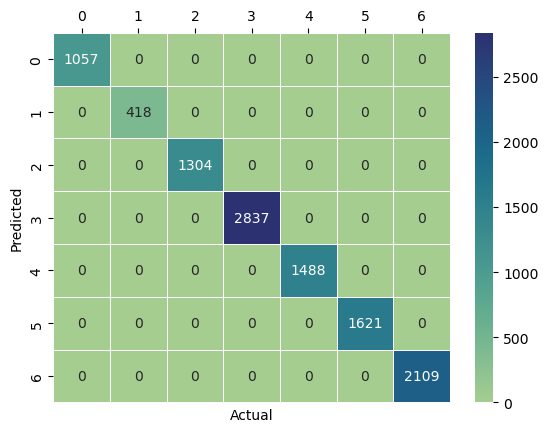

confusion Matrix - testing


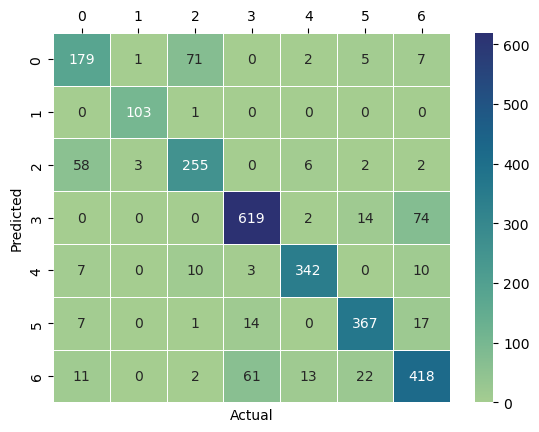

Accuracy Difference: 0.1573, Model Status: overfitting
|   SLno | Model Name                                |   Training Accuracy Score |   Testing Accuracy Score |   Training Recall Score |   Testing Recall Score |   Training Precision Score |   Testing Precision Score |   Training F1 Score |   Testing F1 Score | Cross Validation Used   | Smote used   | Model Fit Status   |
|-------:|:------------------------------------------|--------------------------:|-------------------------:|------------------------:|-----------------------:|---------------------------:|--------------------------:|--------------------:|-------------------:|:------------------------|:-------------|:-------------------|
|      1 | LogisticRegression                        |                  0.88573  |                 0.884459 |                0.88573  |               0.884459 |                   0.885525 |                  0.88506  |            0.886427 |           0.885934 | No                      | No          

In [79]:
## Boosting classification - AdaBoost

base_estimator = DecisionTreeClassifier(random_state=42)

adb = AdaBoostClassifier(
    estimator=base_estimator,
    random_state=42
)

adb.fit(X_train,y_train)

random_adb_predict_train_y = adb.predict(X_train)
random_adb_predict_test_y = adb.predict(X_test)

evaluate_model(y_train, y_test, random_adb_predict_train_y, random_adb_predict_test_y, "AdaBoostClassifier - KNeighborsClassifier ","No","No")
df_results = create_evaluation_dataframe(modelName, accuracy_score_train, accuracy_score_test,
                                recall_score_train, recall_score_test,
                                precision_score_train, precision_score_test,
                                f1_score_train, f1_score_test,CV_Used,smote_used,
                                model_fit_status)

df_report = generate_classification_report(y_train,y_test,random_adb_predict_train_y, random_adb_predict_test_y
                                           ,model_name="AdaBoostClassifier - KNeighborsClassifier ")
all_classification_reports.append(df_report)


### Using SMOTE for balancing the minority class

In [80]:
smote = SMOTEN(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
X_test_smote, y_test_smote = smote.fit_resample(X_test, y_test)



confusion Matrix - training


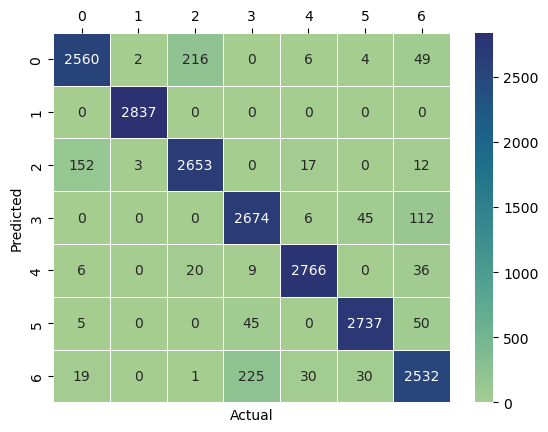

confusion Matrix - testing


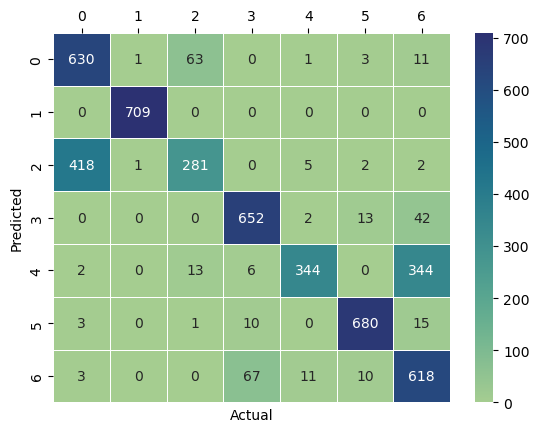

Accuracy Difference: 0.1560, Model Status: overfitting
|   SLno | Model Name                                |   Training Accuracy Score |   Testing Accuracy Score |   Training Recall Score |   Testing Recall Score |   Training Precision Score |   Testing Precision Score |   Training F1 Score |   Testing F1 Score | Cross Validation Used   | Smote used   | Model Fit Status   |
|-------:|:------------------------------------------|--------------------------:|-------------------------:|------------------------:|-----------------------:|---------------------------:|--------------------------:|--------------------:|-------------------:|:------------------------|:-------------|:-------------------|
|      1 | LogisticRegression                        |                  0.88573  |                 0.884459 |                0.88573  |               0.884459 |                   0.885525 |                  0.88506  |            0.886427 |           0.885934 | No                      | No          

ValueError: Found input variables with inconsistent numbers of samples: [10834, 19859]

In [81]:
### KNN , considering number of neighbors as 11 from above 

knc = KNeighborsClassifier(n_neighbors=11)
params_knn = {
    'n_neighbors': range(1, 31),
    'weights': ['uniform', 'distance'],
    'metric': ['minkowski'],
    'p': [1, 2]  # 1=Manhattan, 2=Euclidean
}

random_knc = RandomizedSearchCV(knc,param_distributions=params_knn,random_state=42,scoring='accuracy')

random_knc.fit(X_train_smote,y_train_smote)

random_knc_smote_predict_train_y = random_knc.predict(X_train_smote)
random_knc_smote_predict_test_y = random_knc.predict(X_test_smote)

evaluate_model(y_train_smote, y_test_smote, random_knc_smote_predict_train_y, random_knc_smote_predict_test_y, "KNeighboursClassifier","No","Yes")
df_results = create_evaluation_dataframe(modelName, accuracy_score_train, accuracy_score_test,
                                recall_score_train, recall_score_test,
                                precision_score_train, precision_score_test,
                                f1_score_train, f1_score_test,CV_Used,smote_used,
                                model_fit_status)



In [83]:
df_report = generate_classification_report(y_train_smote, y_test_smote, random_knc_smote_predict_train_y, random_knc_smote_predict_test_y
                                           ,model_name="KNeighboursClassifier ")
all_classification_reports.append(df_report)


confusion Matrix - training


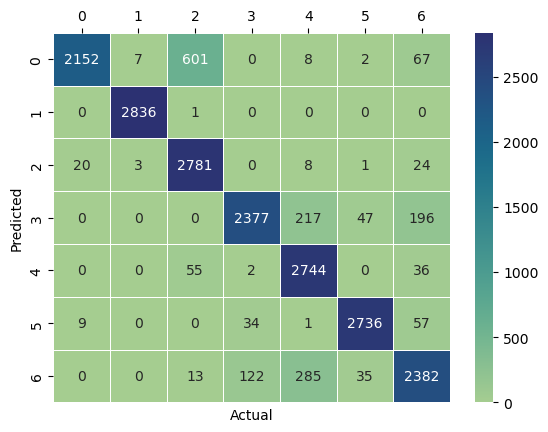

confusion Matrix - testing


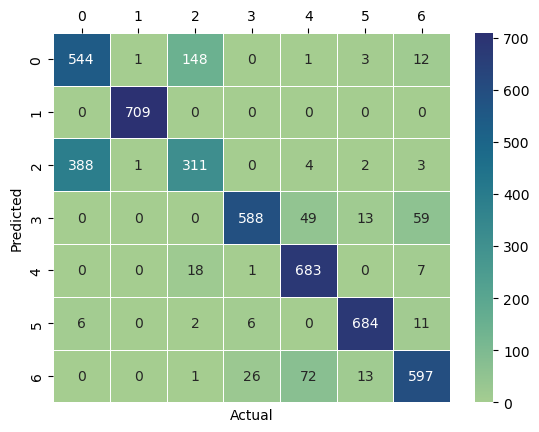

Accuracy Difference: 0.0775, Model Status: balanced
|   SLno | Model Name                                |   Training Accuracy Score |   Testing Accuracy Score |   Training Recall Score |   Testing Recall Score |   Training Precision Score |   Testing Precision Score |   Training F1 Score |   Testing F1 Score | Cross Validation Used   | Smote used   | Model Fit Status   |
|-------:|:------------------------------------------|--------------------------:|-------------------------:|------------------------:|-----------------------:|---------------------------:|--------------------------:|--------------------:|-------------------:|:------------------------|:-------------|:-------------------|
|      1 | LogisticRegression                        |                  0.88573  |                 0.884459 |                0.88573  |               0.884459 |                   0.885525 |                  0.88506  |            0.886427 |           0.885934 | No                      | No           | 

ValueError: Found input variables with inconsistent numbers of samples: [10834, 19859]

In [84]:
lr = LogisticRegression()

param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

random_lr = RandomizedSearchCV(lr,param_distributions=param_grid,random_state=42,scoring='accuracy')
random_lr.fit(X_train_smote,y_train_smote)

random_lr_smote_predict_train_y = random_lr.predict(X_train_smote)
random_lr_smote_predict_test_y = random_lr.predict(X_test_smote)

evaluate_model(y_train_smote, y_test_smote, random_lr_smote_predict_train_y, random_lr_smote_predict_test_y, "LogisticRegression","No","Yes")

df_results = create_evaluation_dataframe(modelName, accuracy_score_train, accuracy_score_test,
                                recall_score_train, recall_score_test,
                                precision_score_train, precision_score_test,
                                f1_score_train, f1_score_test,CV_Used,smote_used,
                                model_fit_status)



In [85]:
df_report = generate_classification_report(y_train_smote, y_test_smote, random_lr_smote_predict_train_y, random_lr_smote_predict_test_y
                                           ,model_name="LogisticRegression ")
all_classification_reports.append(df_report)


confusion Matrix - training


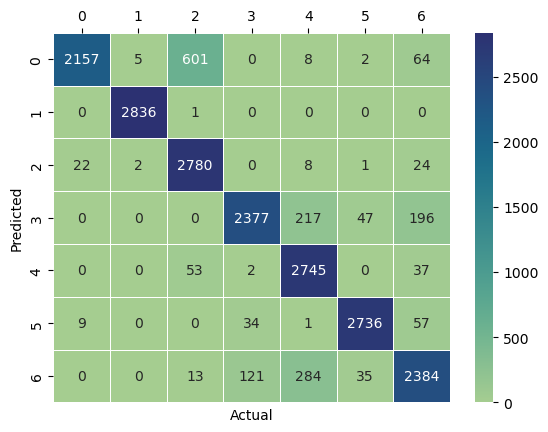

confusion Matrix - testing


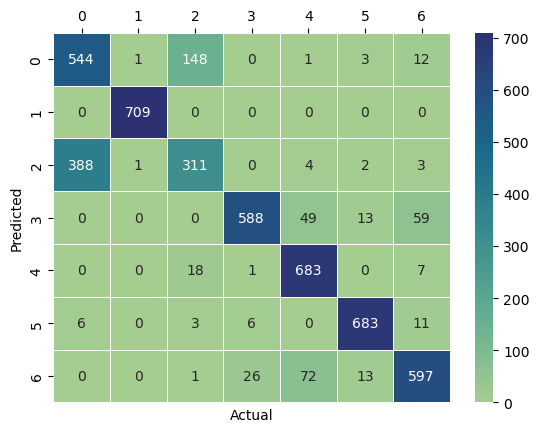

Accuracy Difference: 0.0780, Model Status: balanced
|   SLno | Model Name                                |   Training Accuracy Score |   Testing Accuracy Score |   Training Recall Score |   Testing Recall Score |   Training Precision Score |   Testing Precision Score |   Training F1 Score |   Testing F1 Score | Cross Validation Used   | Smote used   | Model Fit Status   |
|-------:|:------------------------------------------|--------------------------:|-------------------------:|------------------------:|-----------------------:|---------------------------:|--------------------------:|--------------------:|-------------------:|:------------------------|:-------------|:-------------------|
|      1 | LogisticRegression                        |                  0.88573  |                 0.884459 |                0.88573  |               0.884459 |                   0.885525 |                  0.88506  |            0.886427 |           0.885934 | No                      | No           | 

In [86]:
#use stratified k fold

random_lr_cv = RandomizedSearchCV(lr,param_distributions=param_grid,cv=7,random_state=42,scoring='accuracy')
random_lr_cv.fit(X_train_smote,y_train_smote)
random_lr_smote_cv_predict_train_y = random_lr_cv.predict(X_train_smote)
random_lr_smote_cv_predict_test_y = random_lr_cv.predict(X_test_smote)

evaluate_model(y_train_smote, y_test_smote, random_lr_smote_cv_predict_train_y, random_lr_smote_cv_predict_test_y, "LogisticRegression","Yes","Yes")
df_results = create_evaluation_dataframe(modelName, accuracy_score_train, accuracy_score_test,
                                recall_score_train, recall_score_test,
                                precision_score_train, precision_score_test,
                                f1_score_train, f1_score_test,CV_Used,smote_used,
                                model_fit_status)

df_report = generate_classification_report(y_train_smote, y_test_smote,random_lr_smote_cv_predict_train_y, random_lr_smote_cv_predict_test_y
                                           ,model_name="LogisticRegression")

all_classification_reports.append(df_report)


confusion Matrix - training


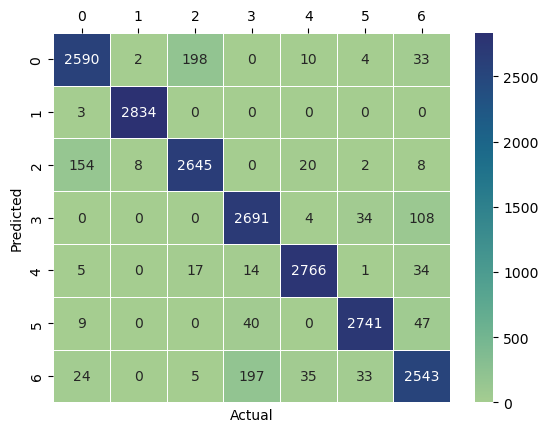

confusion Matrix - testing


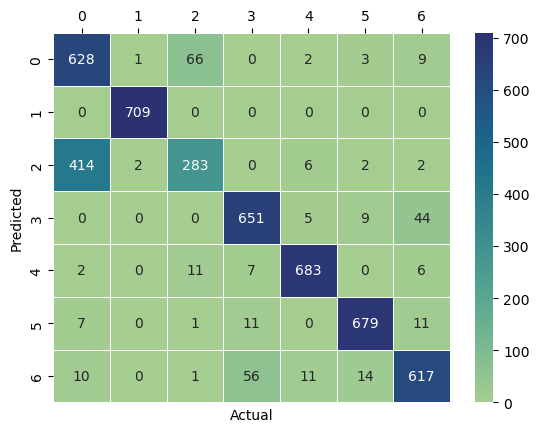

Accuracy Difference: 0.0908, Model Status: balanced
|   SLno | Model Name                                |   Training Accuracy Score |   Testing Accuracy Score |   Training Recall Score |   Testing Recall Score |   Training Precision Score |   Testing Precision Score |   Training F1 Score |   Testing F1 Score | Cross Validation Used   | Smote used   | Model Fit Status   |
|-------:|:------------------------------------------|--------------------------:|-------------------------:|------------------------:|-----------------------:|---------------------------:|--------------------------:|--------------------:|-------------------:|:------------------------|:-------------|:-------------------|
|      1 | LogisticRegression                        |                  0.88573  |                 0.884459 |                0.88573  |               0.884459 |                   0.885525 |                  0.88506  |            0.886427 |           0.885934 | No                      | No           | 

In [87]:
#Decision tree with CV

params_cv = {
    'criterion':['gini','entropy'],
    'splitter':['best','random'],
    'max_depth':range(1,20),
    'min_samples_split':[2,4,6,8,10,12,14],
    'min_samples_leaf':[1,2,4,6,8,10,12,14],
    'ccp_alpha':ccp_alphas.tolist()
}

skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

random_dtc_cv = RandomizedSearchCV(dtc,param_distributions=params_cv,cv=skf,random_state=42,scoring='accuracy')
random_dtc_cv.fit(X_train_smote,y_train_smote)

random_dtc_smote_cv_predict_train_y = random_dtc_cv.predict(X_train_smote)
random_dtc_smote_cv_predict_test_y = random_dtc_cv.predict(X_test_smote)

evaluate_model(y_train_smote, y_test_smote, random_dtc_smote_cv_predict_train_y, random_dtc_smote_cv_predict_test_y, "DecisionTreeClassifier","Yes","Yes")
df_results = create_evaluation_dataframe(modelName, accuracy_score_train, accuracy_score_test,
                                recall_score_train, recall_score_test,
                                precision_score_train, precision_score_test,
                                f1_score_train, f1_score_test,CV_Used,smote_used,
                                model_fit_status)

df_report = generate_classification_report(y_train_smote, y_test_smote,random_dtc_smote_cv_predict_train_y, random_dtc_smote_cv_predict_test_y
                                           ,model_name="DecisionTreeClassifier")

all_classification_reports.append(df_report)


In [97]:
print(random_dtc_cv.best_params_)


{'splitter': 'best', 'min_samples_split': 6, 'min_samples_leaf': 14, 'max_depth': 15, 'criterion': 'entropy', 'ccp_alpha': 0.00015493552045148872}


In [88]:
df_results

SLno                                  Model Name  Training Accuracy Score  \
0      1                          LogisticRegression                    0.886   
1      2                          LogisticRegression                    0.886   
2      3                      DecisionTreeClassifier                    0.896   
3      4                      DecisionTreeClassifier                    0.896   
4      5                      RandomForestClassifier                    0.770   
5      6                      RandomForestClassifier                    0.770   
6      7                       KNeighboursClassifier                    1.000   
7      8                       KNeighboursClassifier                    1.000   
8      9                 SupportVectorClassification                    0.892   
9     10                                  GaussianNB                    0.877   
10    11                            VotingClassifier                    0.951   
11    12                           BaggingClassifier                    0.997   
12    13                           BaggingClassifier                    0.997   
13    14  AdaBoostClassifier - KNeighborsClassifier                     1.000   
14    15                       KNeighboursClassifier                    0.945   
15    16                          LogisticRegression                    0.907   
16    17                          LogisticRegression                    0.907   
17    18                      DecisionTreeClassifier                    0.947   

    Testing Accuracy Score  Training Recall Score  Testing Recall Score  \
0                    0.884                  0.886                 0.884   
1                    0.884                  0.886                 0.884   
2                    0.869                  0.896                 0.869   
3                    0.869                  0.896                 0.869   
4                    0.767                  0.770                 0.767   
5                    0.767                  0.770                 0.767   
6                    0.884                  1.000                 0.884   
7                    0.884                  1.000                 0.884   
8                    0.889                  0.892                 0.889   
9                    0.880                  0.877                 0.880   
10                   0.879                  0.951                 0.879   
11                   0.884                  0.997                 0.884   
12                   0.883                  0.997                 0.883   
13                   0.843                  1.000                 0.843   
14                   0.789                  0.945                 0.789   
15                   0.829                  0.907                 0.829   
16                   0.829                  0.907                 0.829   
17                   0.856                  0.947                 0.856   

    Training Precision Score  Testing Precision Score  Training F1 Score  \
0                      0.886                    0.885              0.886   
1                      0.886                    0.885              0.886   
2                      0.895                    0.868              0.894   
3                      0.895                    0.868              0.894   
4                      0.742                    0.739              0.649   
5                      0.742                    0.739              0.649   
6                      1.000                    0.885              1.000   
7                      1.000                    0.885              1.000   
8                      0.892                    0.890              0.892   
9                      0.878                    0.883              0.876   
10                     0.954                    0.878              0.953   
11                     0.997                    0.884              0.997   
12                     0.997                    0.

confusion Matrix - training


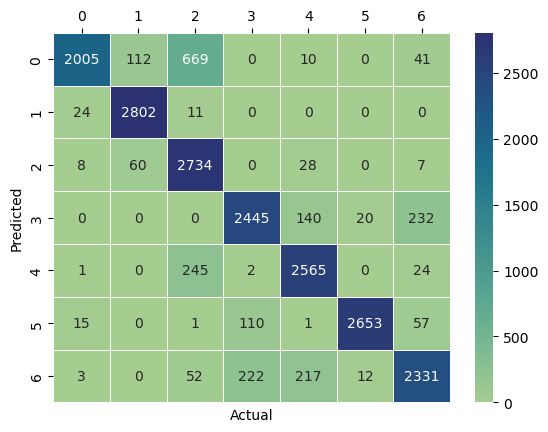

confusion Matrix - testing


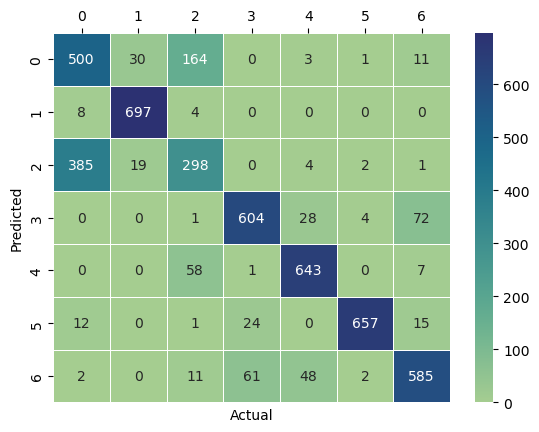

Accuracy Difference: 0.0802, Model Status: balanced
|   SLno | Model Name                                |   Training Accuracy Score |   Testing Accuracy Score |   Training Recall Score |   Testing Recall Score |   Training Precision Score |   Testing Precision Score |   Training F1 Score |   Testing F1 Score | Cross Validation Used   | Smote used   | Model Fit Status   |
|-------:|:------------------------------------------|--------------------------:|-------------------------:|------------------------:|-----------------------:|---------------------------:|--------------------------:|--------------------:|-------------------:|:------------------------|:-------------|:-------------------|
|      1 | LogisticRegression                        |                  0.88573  |                 0.884459 |                0.88573  |               0.884459 |                   0.885525 |                  0.88506  |            0.886427 |           0.885934 | No                      | No           | 

In [89]:
 #considering ccp_alpha value from decision tree best param with CV
rfc = RandomForestClassifier(bootstrap=True,oob_score=True,random_state=42,ccp_alpha=0.00032845435305467463)

params_rfc = { 
    'n_estimators':range(10,250,20),
    'criterion':['gini','entropy'],
    'max_depth':range(1,20),
    'min_samples_split':[2,4,6,8,10,12,14],
    'min_samples_leaf':range(1,15),
    'max_samples':range(0, 15)
    }

skf = StratifiedKFold(n_splits=7, shuffle=True, random_state=42)
random_rfc_cv = RandomizedSearchCV(rfc,param_distributions=params_rfc,random_state=42,cv=skf,scoring='accuracy')
random_rfc_cv.fit(X_train_smote,y_train_smote)

random_rfc_smote_cv_predict_train_y = random_rfc_cv.predict(X_train_smote)
random_rfc_smote_cv_predict_test_y = random_rfc_cv.predict(X_test_smote)

evaluate_model(y_train_smote, y_test_smote, random_rfc_smote_cv_predict_train_y, random_rfc_smote_cv_predict_test_y, "RandomForestClassifier","Yes","Yes")
df_results = create_evaluation_dataframe(modelName, accuracy_score_train, accuracy_score_test,
                                recall_score_train, recall_score_test,
                                precision_score_train, precision_score_test,
                                f1_score_train, f1_score_test,CV_Used,smote_used,
                                model_fit_status)

df_report = generate_classification_report(y_train_smote, y_test_smote, random_rfc_smote_cv_predict_train_y, random_rfc_smote_cv_predict_test_y
                                           ,model_name="RandomForestClassifier")

all_classification_reports.append(df_report)


GaussianNB(var_smoothing=1e-12)
{'var_smoothing': 1e-12}
0.8339796270772935
confusion Matrix - training


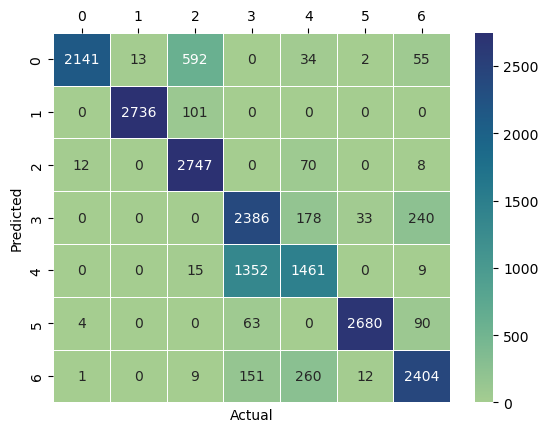

confusion Matrix - testing


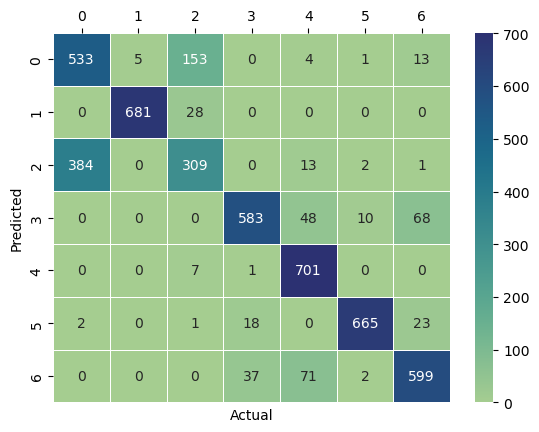

Accuracy Difference: 0.0134, Model Status: balanced
|   SLno | Model Name                                |   Training Accuracy Score |   Testing Accuracy Score |   Training Recall Score |   Testing Recall Score |   Training Precision Score |   Testing Precision Score |   Training F1 Score |   Testing F1 Score | Cross Validation Used   | Smote used   | Model Fit Status   |
|-------:|:------------------------------------------|--------------------------:|-------------------------:|------------------------:|-----------------------:|---------------------------:|--------------------------:|--------------------:|-------------------:|:------------------------|:-------------|:-------------------|
|      1 | LogisticRegression                        |                  0.88573  |                 0.884459 |                0.88573  |               0.884459 |                   0.885525 |                  0.88506  |            0.886427 |           0.885934 | No                      | No           | 

In [90]:
### Naive Baye's 
gnb = GaussianNB()
param_grid = {
    'var_smoothing': np.logspace(-12, -6, 20)  
}

skf = StratifiedKFold(n_splits=25,shuffle=True, random_state=42)

random_gnb_cv = RandomizedSearchCV(gnb,param_distributions=param_grid,cv=skf,random_state=42,scoring='accuracy')

random_gnb_cv.fit(X_train_smote,y_train_smote)

random_gnb_smote_cv_predict_train_y = random_gnb_cv.predict(X_train_smote)
random_gnb_smote_cv_predict_test_y = random_gnb_cv.predict(X_test_smote)

print(random_gnb_cv.best_estimator_)
print(random_gnb_cv.best_params_)
print(random_gnb_cv.best_score_)

evaluate_model(y_train_smote, y_test_smote, random_gnb_smote_cv_predict_train_y, random_gnb_smote_cv_predict_test_y, "GaussianNB","Yes","Yes")
df_results = create_evaluation_dataframe(modelName, accuracy_score_train, accuracy_score_test,
                                recall_score_train, recall_score_test,
                                precision_score_train, precision_score_test,
                                f1_score_train, f1_score_test,CV_Used,smote_used,
                                model_fit_status)

df_report = generate_classification_report(y_train_smote, y_test_smote, random_gnb_smote_cv_predict_train_y, random_gnb_smote_cv_predict_test_y
                                           ,model_name="GaussianNB")

all_classification_reports.append(df_report)


confusion Matrix - training


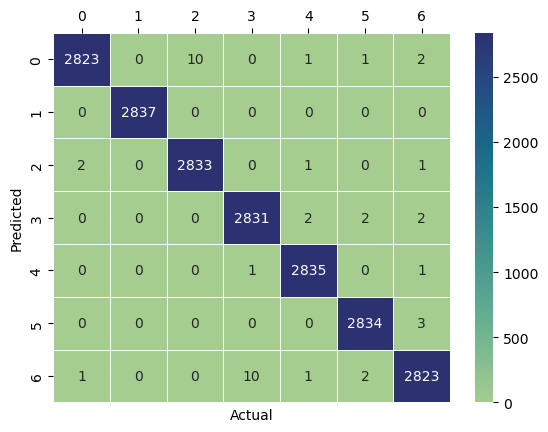

confusion Matrix - testing


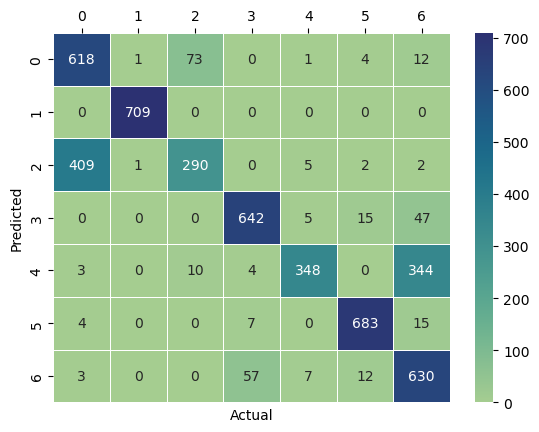

Accuracy Difference: 0.2080, Model Status: overfitting
|   SLno | Model Name                                |   Training Accuracy Score |   Testing Accuracy Score |   Training Recall Score |   Testing Recall Score |   Training Precision Score |   Testing Precision Score |   Training F1 Score |   Testing F1 Score | Cross Validation Used   | Smote used   | Model Fit Status   |
|-------:|:------------------------------------------|--------------------------:|-------------------------:|------------------------:|-----------------------:|---------------------------:|--------------------------:|--------------------:|-------------------:|:------------------------|:-------------|:-------------------|
|      1 | LogisticRegression                        |                  0.88573  |                 0.884459 |                0.88573  |               0.884459 |                   0.885525 |                  0.88506  |            0.886427 |           0.885934 | No                      | No          

In [91]:
## Bagging 

bgc = BaggingClassifier(estimator=random_knc_cv)
bgc.fit(X_train_smote,y_train_smote)

random_bgc_smote_predict_train_y = bgc.predict(X_train_smote)
random_bgc_smote_predict_test_y = bgc.predict(X_test_smote)

evaluate_model(y_train_smote, y_test_smote, random_bgc_smote_predict_train_y, random_bgc_smote_predict_test_y, "BaggingClassifier","No","Yes")
df_results = create_evaluation_dataframe(modelName, accuracy_score_train, accuracy_score_test,
                                recall_score_train, recall_score_test,
                                precision_score_train, precision_score_test,
                                f1_score_train, f1_score_test,CV_Used,smote_used,
                                model_fit_status)

df_report = generate_classification_report(y_train_smote, y_test_smote, random_bgc_smote_predict_train_y, random_bgc_smote_predict_test_y
                                           ,model_name="BaggingClassifier")

all_classification_reports.append(df_report)


In [104]:
df_combined = df_report.merge(df_results, on='SLno', how='inner')

In [105]:
df_combined

Class  precision  recall  f1-score  support Dataset          ModelName  \
0      0      0.999   0.995     0.997   2837.0   Train  BaggingClassifier   
1      1      1.000   1.000     1.000   2837.0   Train  BaggingClassifier   
2      2      0.996   0.999     0.998   2837.0   Train  BaggingClassifier   
3      3      0.996   0.998     0.997   2837.0   Train  BaggingClassifier   
4      4      0.998   0.999     0.999   2837.0   Train  BaggingClassifier   
5      5      0.998   0.999     0.999   2837.0   Train  BaggingClassifier   
6      6      0.997   0.995     0.996   2837.0   Train  BaggingClassifier   
7      0      0.596   0.872     0.708    709.0    Test  BaggingClassifier   
8      1      0.997   1.000     0.999    709.0    Test  BaggingClassifier   
9      2      0.777   0.409     0.536    709.0    Test  BaggingClassifier   
10     3      0.904   0.906     0.905    709.0    Test  BaggingClassifier   
11     4      0.951   0.491     0.647    709.0    Test  BaggingClassifier   
12     5      0.954   0.963     0.959    709.0    Test  BaggingClassifier   
13     6      0.600   0.889     0.716    709.0    Test  BaggingClassifier   

    SLno         Model Name  Training Accuracy Score  Testing Accuracy Score  \
0     21  BaggingClassifier                    0.998                    0.79   
1     21  BaggingClassifier                    0.998                    0.79   
2     21  BaggingClassifier                    0.998                    0.79   
3     21  BaggingClassifier                    0.998                    0.79   
4     21  BaggingClassifier                    0.998                    0.79   
5     21  BaggingClassifier                    0.998                    0.79   
6     21  BaggingClassifier                    0.998                    0.79   
7     21  BaggingClassifier                    0.998                    0.79   
8     21  BaggingClassifier                    0.998                    0.79   
9     21  BaggingClassifier                    0.998                    0.79   
10    21  BaggingClassifier                    0.998                    0.79   
11    21  BaggingClassifier                    0.998                    0.79   
12    21  BaggingClassifier                    0.998                    0.79   
13    21  BaggingClassifier                    0.998                    0.79   

    Training Recall Score  Testing Recall Score  Training Precision Score  \
0                   0.998                  0.79                     0.998   
1                   0.998                  0.79                     0.998   
2                   0.998                  0.79                     0.998   
3                   0.998                  0.79                     0.998   
4                   0.998                  0.79                     0.998   
5                   0.998                  0.79                     0.998   
6                   0.998                  0.79                     0.998   
7                   0.998                  0.79                     0.998   
8                   0.998                  0.79                     0.998   
9                   0.998                  0.79                     0.998   
10                  0.998                  0.79                     0.998   
11                  0.998                  0.79                     0.998   
12                  0.998                  0.79                     0.998   
13                  0.998                  0.79                     0.998   

    Testing Precision Score  Training F1 Score  Testing F1 Score  \
0                     0.826              0.998             0.781   
1                     0.826              0.998             0.781   
2                     0.826              0.998             0.781   
3                     0.826              0.998             0.781   
4                     0.826              0.998             0.781   
5                     0.826              0.998             0.781   
6             

In [94]:
df_results

SLno                                  Model Name  Training Accuracy Score  \
0      1                          LogisticRegression                    0.886   
1      2                          LogisticRegression                    0.886   
2      3                      DecisionTreeClassifier                    0.896   
3      4                      DecisionTreeClassifier                    0.896   
4      5                      RandomForestClassifier                    0.770   
5      6                      RandomForestClassifier                    0.770   
6      7                       KNeighboursClassifier                    1.000   
7      8                       KNeighboursClassifier                    1.000   
8      9                 SupportVectorClassification                    0.892   
9     10                                  GaussianNB                    0.877   
10    11                            VotingClassifier                    0.951   
11    12                           BaggingClassifier                    0.997   
12    13                           BaggingClassifier                    0.997   
13    14  AdaBoostClassifier - KNeighborsClassifier                     1.000   
14    15                       KNeighboursClassifier                    0.945   
15    16                          LogisticRegression                    0.907   
16    17                          LogisticRegression                    0.907   
17    18                      DecisionTreeClassifier                    0.947   
18    19                      RandomForestClassifier                    0.883   
19    20                                  GaussianNB                    0.834   
20    21                           BaggingClassifier                    0.998   

    Testing Accuracy Score  Training Recall Score  Testing Recall Score  \
0                    0.884                  0.886                 0.884   
1                    0.884                  0.886                 0.884   
2                    0.869                  0.896                 0.869   
3                    0.869                  0.896                 0.869   
4                    0.767                  0.770                 0.767   
5                    0.767                  0.770                 0.767   
6                    0.884                  1.000                 0.884   
7                    0.884                  1.000                 0.884   
8                    0.889                  0.892                 0.889   
9                    0.880                  0.877                 0.880   
10                   0.879                  0.951                 0.879   
11                   0.884                  0.997                 0.884   
12                   0.883                  0.997                 0.883   
13                   0.843                  1.000                 0.843   
14                   0.789                  0.945                 0.789   
15                   0.829                  0.907                 0.829   
16                   0.829                  0.907                 0.829   
17                   0.856                  0.947                 0.856   
18                   0.803                  0.883                 0.803   
19                   0.820                  0.834                 0.820   
20                   0.790                  0.998                 0.790   

    Training Precision Score  Testing Precision Score  Training F1 Score  \
0                      0.886                    0.885              0.886   
1                      0.886                    0.885              0.886   
2                      0.895                    0.868              0.894   
3                      0.895                    0.868              0.894   
4                      0.742                    0.739              0.649   
5                      0.742                    0.739              0.649   
6                      1.000          

### Decision tree with smoteenc with cross validation is giving best result. 

In [100]:


print(random_dtc_cv.best_params_)

{'splitter': 'best', 'min_samples_split': 6, 'min_samples_leaf': 14, 'max_depth': 15, 'criterion': 'entropy', 'ccp_alpha': 0.00015493552045148872}


In [103]:
dtc_fi = DecisionTreeClassifier(random_state=42)
params_cv_fi = {
    'criterion':['entropy'],
    'splitter':['best'],
    'max_depth':[15],
    'min_samples_split':[6],
    'min_samples_leaf':[14],
    'ccp_alpha':[0.00015493552045148872]
}

random_dtc_cv_fi = RandomizedSearchCV(dtc,param_distributions=params_cv_fi,random_state=42,scoring='accuracy')
random_dtc_cv_fi.fit(X_train_smote,y_train_smote)

RandomizedSearchCV(estimator=DecisionTreeClassifier(),
                   param_distributions={'ccp_alpha': [0.00015493552045148872],
                                        'criterion': ['entropy'],
                                        'max_depth': [15],
                                        'min_samples_leaf': [14],
                                        'min_samples_split': [6],
                                        'splitter': ['best']},
                   random_state=42, scoring='accuracy')

In [107]:
import os
import pickle

In [108]:
### Saving feature scaling as pickle file
filename='scaler.pkl'
filename_pca = 'PCA.pkl'
if os.path.exists(filename):
    os.remove(filename)  

with open(filename, 'wb') as file:
    pickle.dump(scaler, file)


with open(filename_pca, 'wb') as file:
    pickle.dump(PCA_X, file)

In [109]:
### Saving model as pickle file
filename='model.pkl'
if os.path.exists(filename):
    os.remove(filename)  

with open(filename, 'wb') as file:
    pickle.dump(random_dtc_cv_fi, file)

In [ ]:
df_combined.to_csv("model_evaluation_results.csv", index=False)


In [110]:
import streamlit as st
import numpy as np
import pickle

st.image("bean.webp")

# Load saved models
with open('scaler.pkl', 'rb') as f:
    scaler = pickle.load(f)

with open('PCA.pkl', 'rb') as f:
    pca = pickle.load(f)

with open('model.pkl', 'rb') as f:
    model = pickle.load(f)

# Define feature inputs
columns = ['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
           'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter',
           'Extent', 'Solidity', 'roundness', 'Compactness',
           'ShapeFactor1', 'ShapeFactor2', 'ShapeFactor3', 'ShapeFactor4']

# Class mapping
label_map = {
    0: 'BARBUNYA',
    1: 'BOMBAY',
    2: 'CALI',
    3: 'DERMASON',
    4: 'HOROZ',
    5: 'SEKER',
    6: 'SIRA'
}

st.title("Bean class classification")
st.markdown("Enter Avaiable Bean Information to Predict Classification")

# Collect user input
user_input = []
for col in columns:
    val = st.number_input(f"{col}", min_value=0.0, step=0.01)
    user_input.append(val)

# Predict button
if st.button("Classify Bean"):
    input_array = np.array(user_input).reshape(1, -1)
    scaled = scaler.transform(input_array)
    reduced = pca.transform(scaled)
    predicted_label = model.predict(reduced)[0]
    predicted_class = label_map.get(predicted_label, "Unknown")

    st.success(f"Predicted Bean Category: **{predicted_class}**")


2025-06-29 00:45:06.913 
  command:

    streamlit run C:\Users\Hp\anaconda3\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-06-29 00:45:06.978 Session state does not function when running a script without `streamlit run`
